# Explore datasets

There are two datasets:
- ed_visits.csv 
- yet_to_arrive.csv

See the data dictionaries for more information. 

The ed_visits database uses the following concepts:

- visit: a single visit to the ED which may end in admission or discharge
- prediction times: the times in the day at which predictions are to be made (eg 06:00, 09:30, 12:00, 15:30, 22:00)
- visit snapshots: snapshots of visits observed at the prediction times; a vist may have multiple visit snapshots



## Set up the notebook environment


In [1]:
# Reload functions every time
%load_ext autoreload 
%autoreload 2

In [2]:
from pathlib import Path
import sys
import json


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


PROJECT_ROOT = Path().home() 
USER_ROOT = Path().home() / 'work'

sys.path.append(str(USER_ROOT / 'patientflow' / 'patientflow'))
sys.path.append(str(USER_ROOT / 'patientflow' / 'functions'))
sys.path.append(str(USER_ROOT / 'ed-predictor' / 'functions'))


data_path = Path(USER_ROOT / 'ed-predictor' / 'data-raw')



## Load parameters

These are set in config.json. You can change these for your own purposes. But the times of day will need to match those in the provided dataset if you want to run this notebook successfully.

In [3]:
# Load the times of day
import yaml

config_path = Path(USER_ROOT / 'patientflow')

with open(config_path / 'config.yaml', 'r') as file:
    config = yaml.safe_load(file)
    
# Convert list of times of day at which predictions will be made (currently stored as lists) to list of tuples
prediction_times = [tuple(item) for item in config['prediction_times']]

# See the times of day at which predictions will be made
prediction_times

[(6, 0), (9, 30), (12, 0), (15, 30), (22, 0)]

## Load ED visits data

In [4]:
start_date = '20220101'
end_date = '20240301'

In [6]:
import pandas as pd
import pickle

# csv_filename = 'ed_visits.csv'
# data_path = Path(USER_ROOT / 'ed-predictor' / 'data-raw')
# full_path = data_path / csv_filename
# visits = pd.read_csv(full_path)

data_filename = 'ed_visits_exc_beds_inc_minority_' + start_date + '_' + end_date + '.pickle'
data_path = Path(USER_ROOT / 'ed-predictor' / 'data-raw')
full_path = data_path / data_filename

with open(full_path, 'rb') as f:
    visits = pickle.load(f)

In [ ]:
# certain columns are not used in training
exclude_from_plot = [
    "snapshot_id", 
    "visit_number",
    "snapshot_date",
    "prediction_time",
    "random_number",
    "training_validation_test", 
    "is_admitted"]

In [8]:

# dict_cols

### Grouping of columns in visits dataset

In [79]:
from data_dict_functions import get_dict_cols
from plot_data import plot_distributions
dict_cols = get_dict_cols(visits)

for key, value in dict_cols.items():
    print(f"\nColumns in group called {key}:")
    print(value)



Column 'elapsed_los_hrs' did not match any predefined group

Columns in group called not used in training:
['snapshot_id', 'snapshot_date', 'prediction_time', 'visit_number', 'training_validation_test', 'random_number']

Columns in group called arrival and demographic:
['elapsed_los', 'sex', 'age_group', 'arrival_method']

Columns in group called summary:
['num_obs', 'num_obs_events', 'num_obs_types', 'num_lab_batteries_ordered']

Columns in group called location:
['current_location_type', 'total_locations_visited', 'visited_majors', 'visited_otf', 'visited_paeds', 'visited_rat', 'visited_resus', 'visited_sdec', 'visited_sdec_waiting', 'visited_taf', 'visited_unknown', 'visited_utc', 'visited_waiting']

Columns in group called observations:
['num_obs_pulse', 'num_obs_air_or_oxygen', 'num_obs_level_of_consciousness', 'num_obs_uclh_ed_manchester_triage_calculated_acuity', 'num_obs_uclh_ed_manchester_triage_objective_pain_score', 'num_obs_uclh_ed_manchester_triage_subjective_pain_score', 

In [91]:
# Function to convert boolean columns to text values "true" or "false"
def bool_to_text(df):
    bool_cols = df.select_dtypes(include='bool').columns
    for col in bool_cols:
        df[col] = df[col].apply(lambda x: 'true' if x else 'false')
    return df

# Apply the function
df = bool_to_text(df)

### Arrival and demographic variables



#### Elapsed Length of Stay

There is not as much variation as we'd expect between admitted and not admitted visits


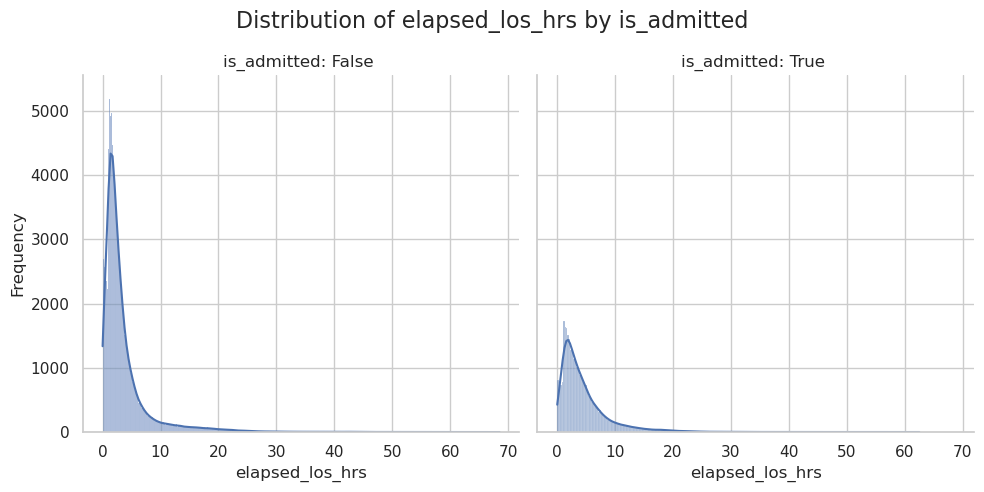

In [44]:
df['elapsed_los_hrs'] = df['elapsed_los']/3600
plot_distributions(df, 'elapsed_los_hrs', 'is_admitted', plot_type='both')

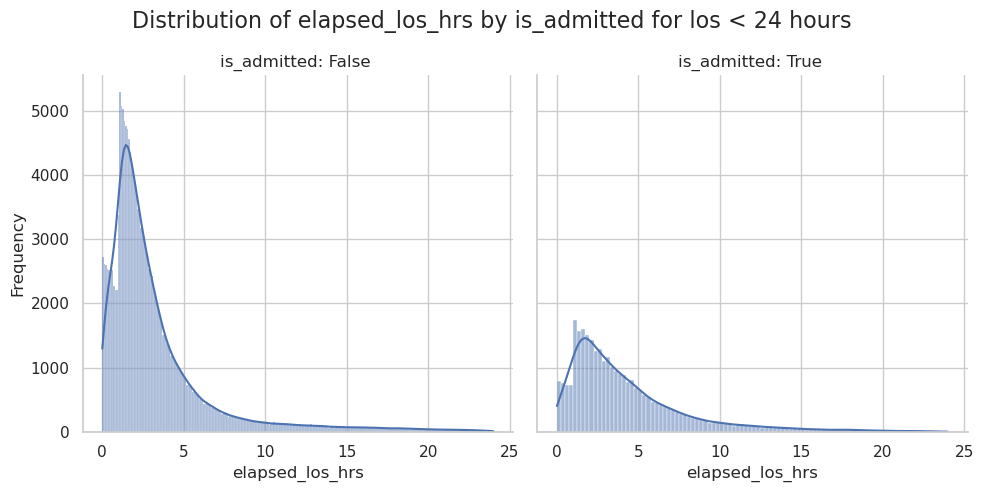

In [48]:
plot_distributions(df[df.elapsed_los_hrs < 24], 'elapsed_los_hrs', 'is_admitted', plot_type='both', title = 'Distribution of elapsed_los_hrs by is_admitted for los < 24 hours')

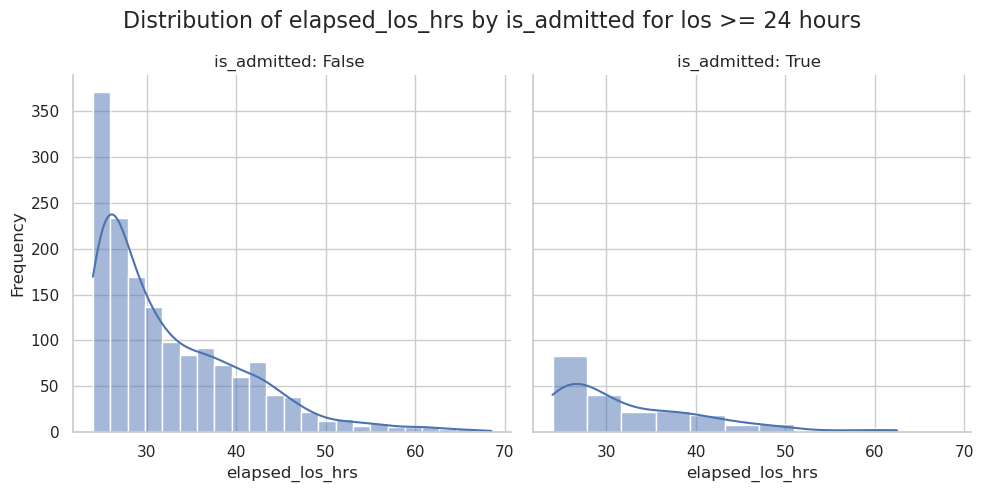

In [49]:
plot_distributions(df[df.elapsed_los_hrs >= 24], 'elapsed_los_hrs', 'is_admitted', plot_type='both', title = 'Distribution of elapsed_los_hrs by is_admitted for los >= 24 hours')

#### Sex, age group and arrival method

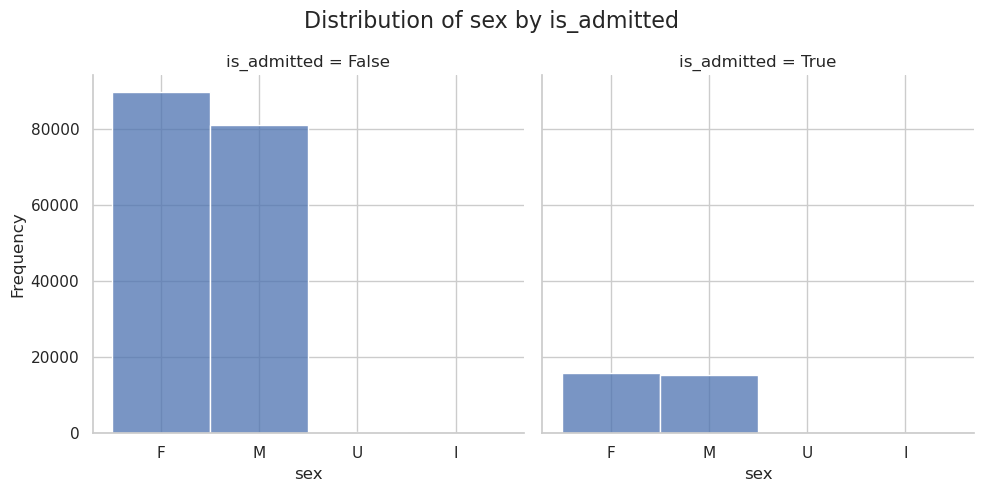

In [71]:
plot_distributions(df, 'sex', 'is_admitted', plot_type='hist')

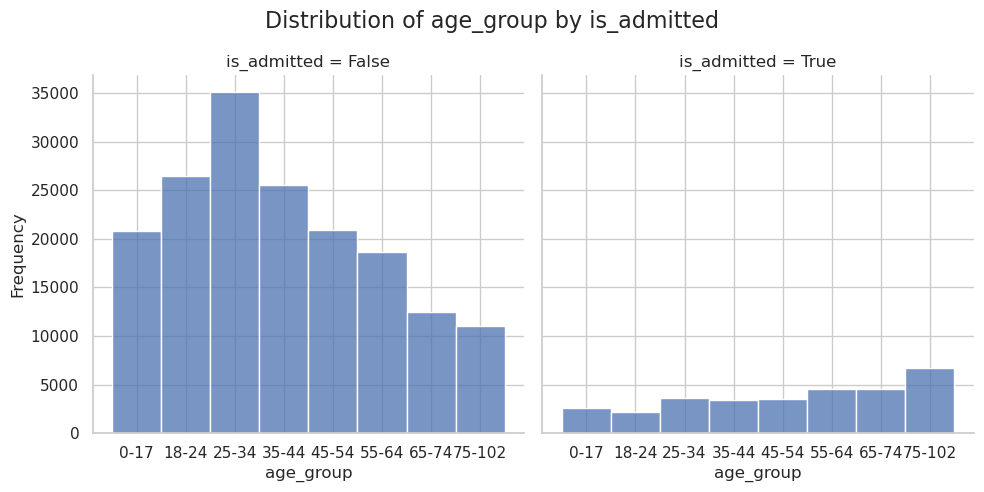

In [72]:
if 'age_group' in df.columns:
    plot_distributions(df, 'age_group', 'is_admitted', plot_type='hist')

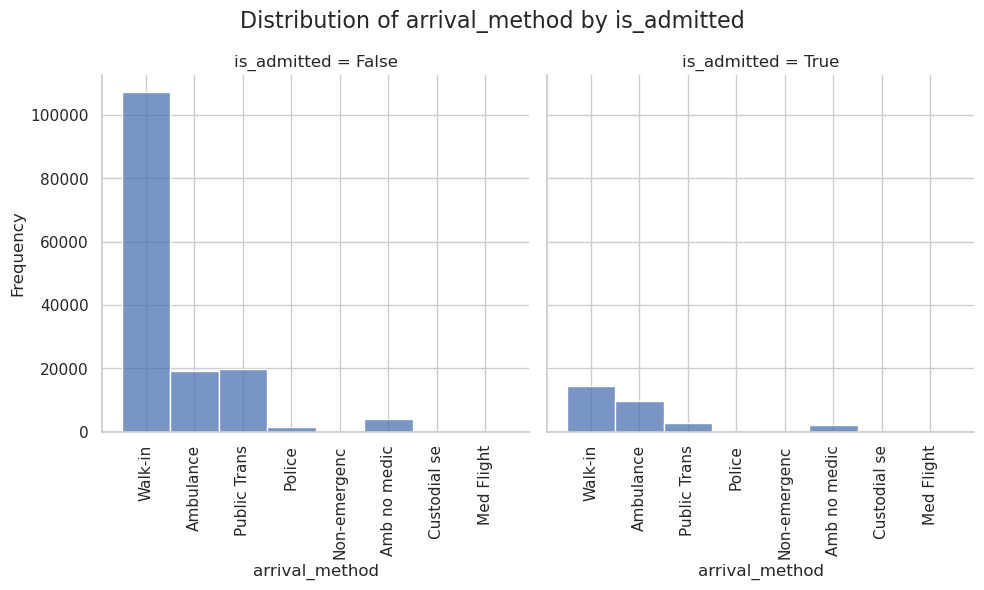

In [85]:
plot_distributions(df, 'arrival_method', 'is_admitted', plot_type='hist', rotate_x_labels = True)

### Summary variables

In [59]:
dict_cols['summary']

['num_obs', 'num_obs_events', 'num_obs_types', 'num_lab_batteries_ordered']

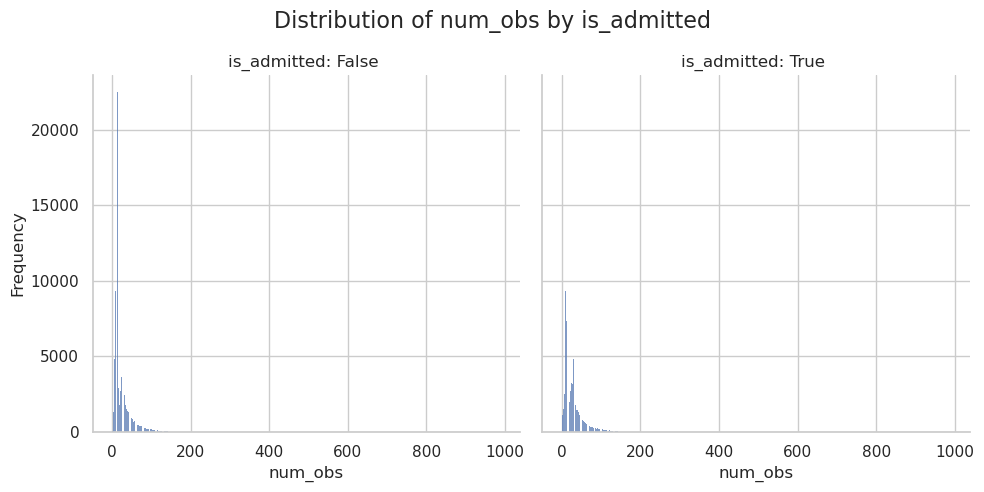

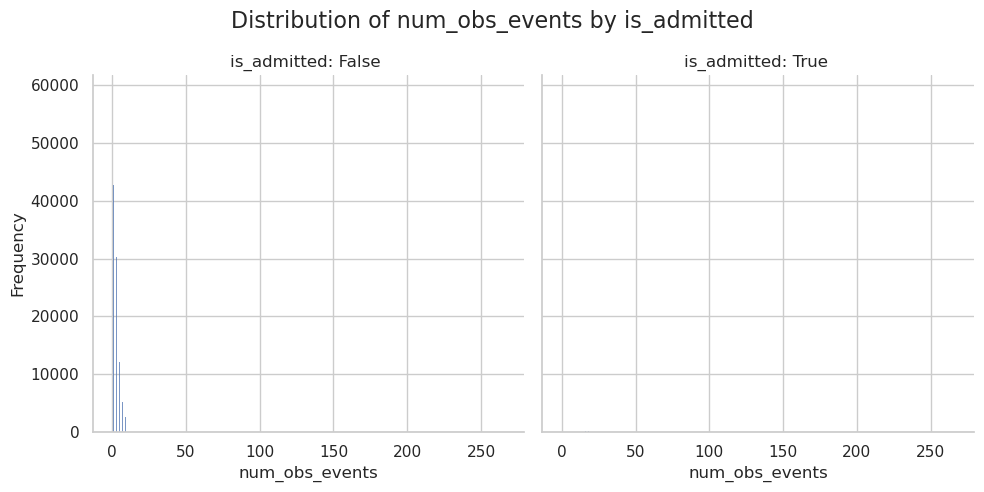

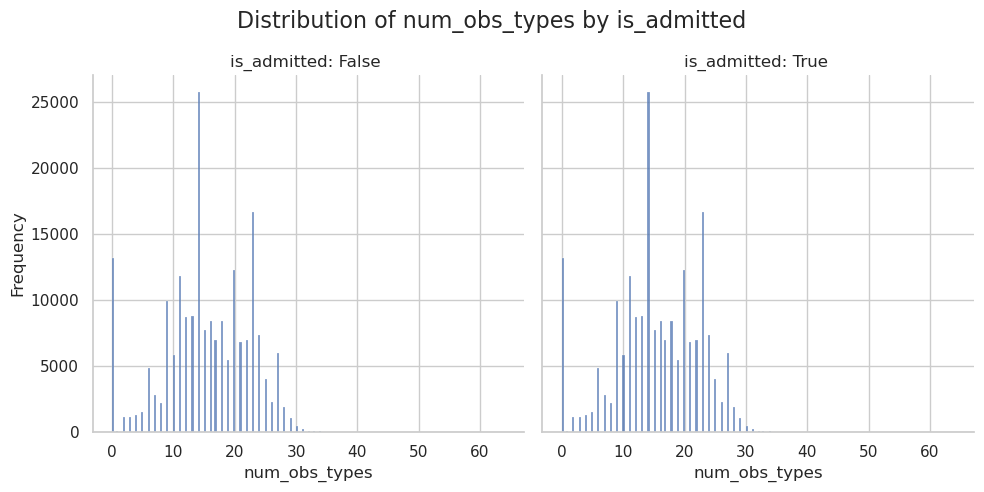

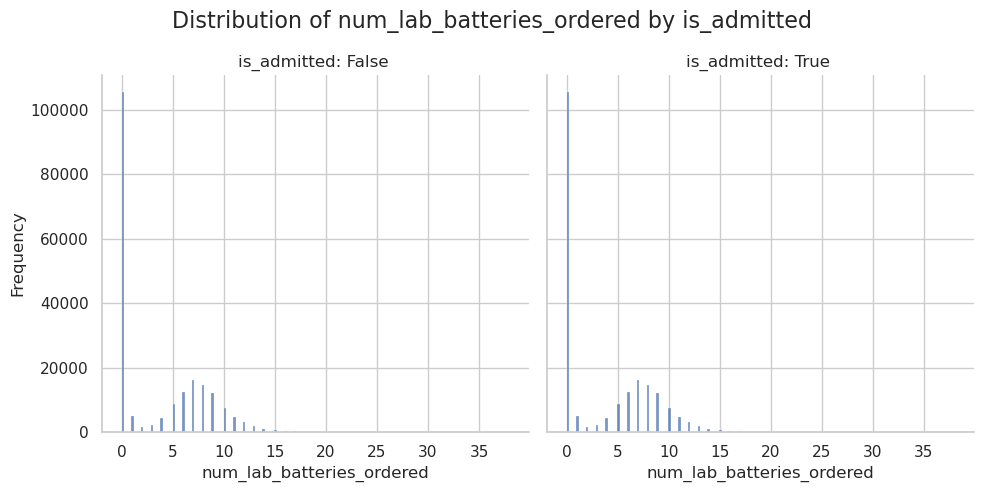

In [62]:
for col_name in dict_cols['summary']:
    plot_distributions(df, col_name, 'is_admitted', plot_type='hist')

### Location variables

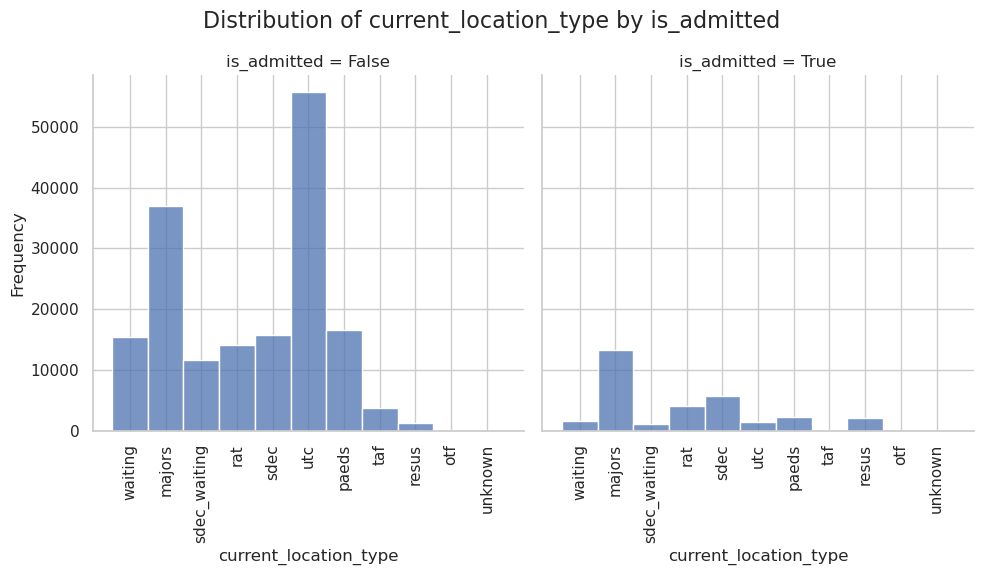

In [88]:
plot_distributions(df, 'current_location_type', 'is_admitted', plot_type='hist', rotate_x_labels = True)

In [89]:
dict_cols['location']

['current_location_type',
 'total_locations_visited',
 'visited_majors',
 'visited_otf',
 'visited_paeds',
 'visited_rat',
 'visited_resus',
 'visited_sdec',
 'visited_sdec_waiting',
 'visited_taf',
 'visited_unknown',
 'visited_utc',
 'visited_waiting']

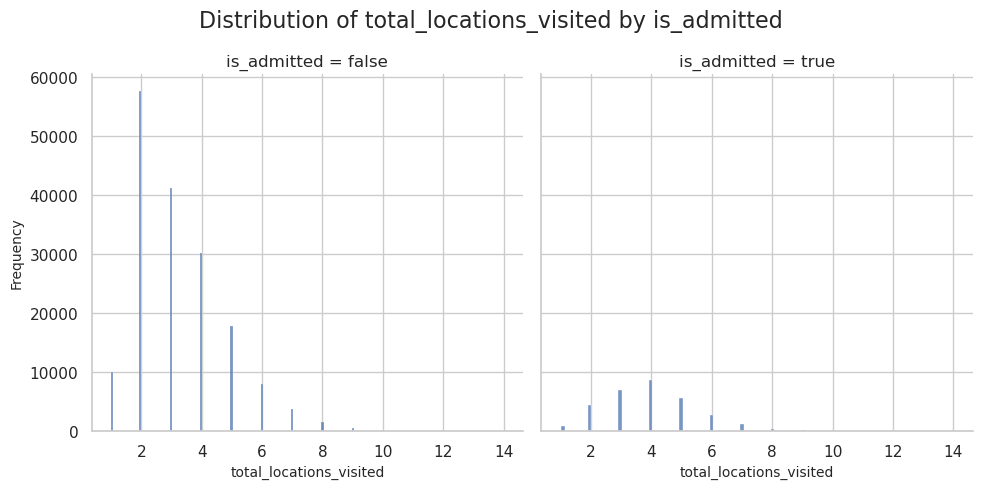

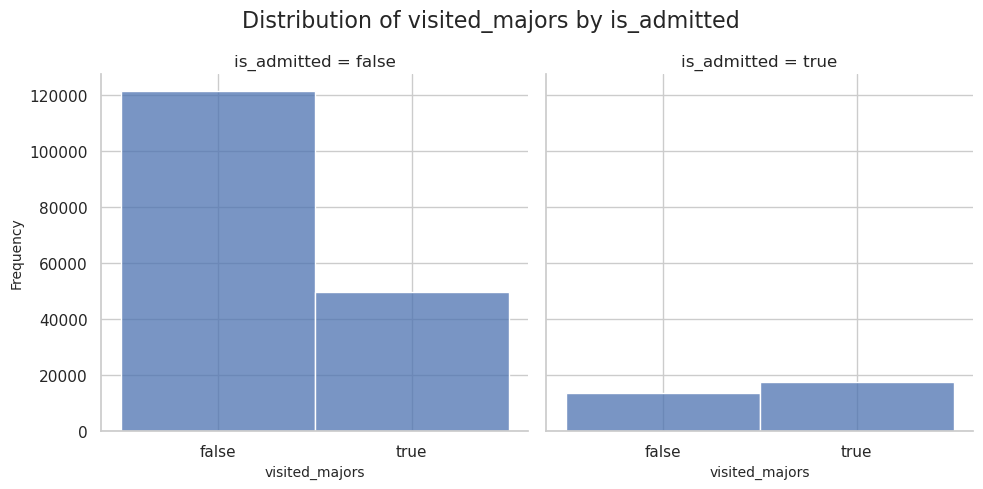

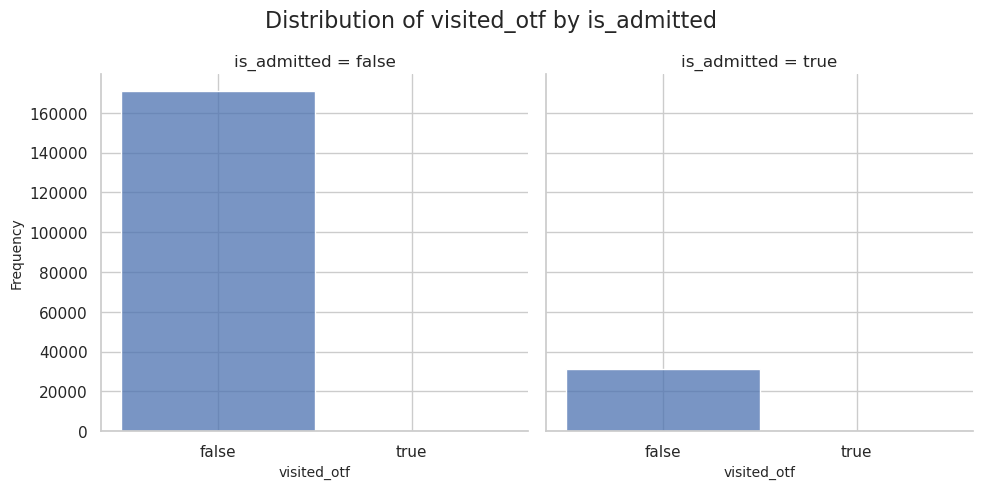

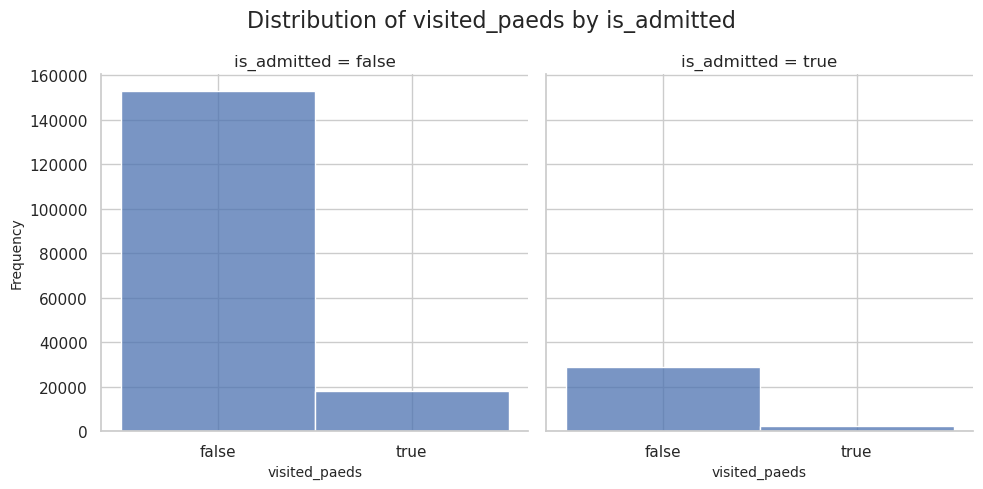

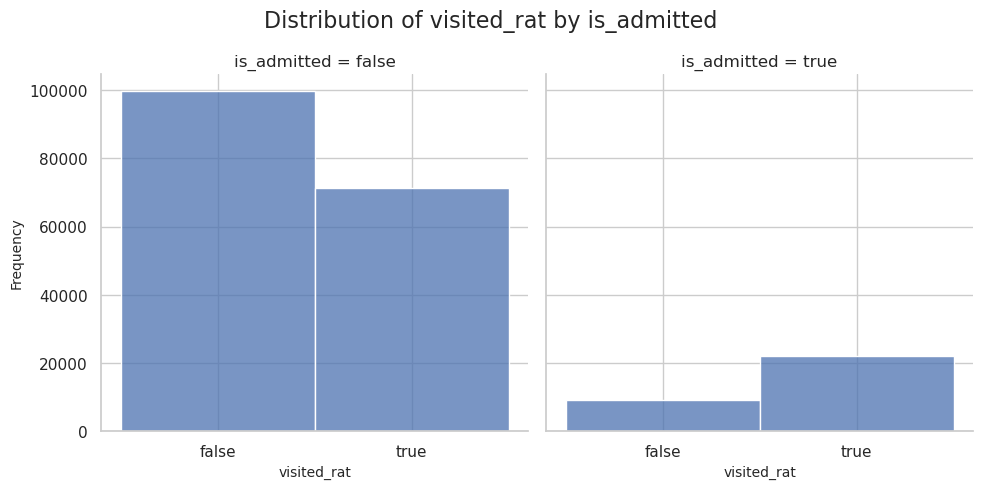

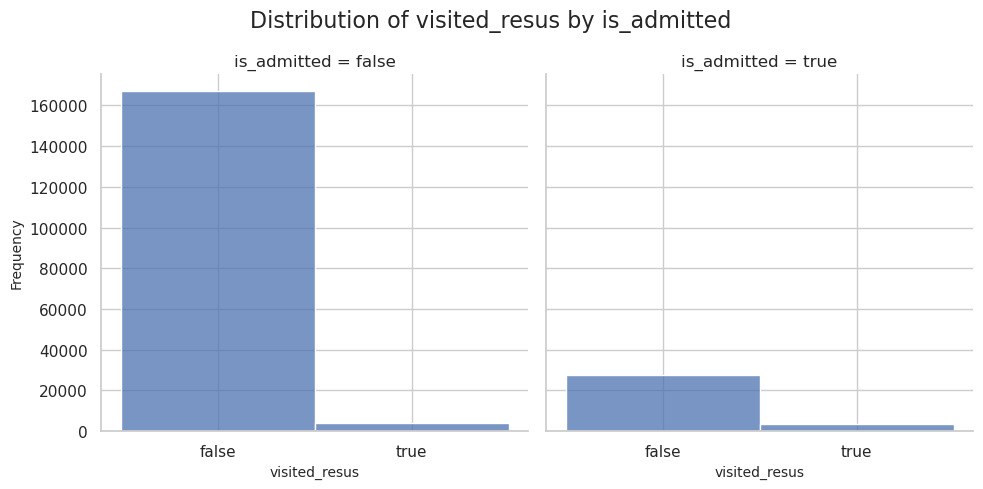

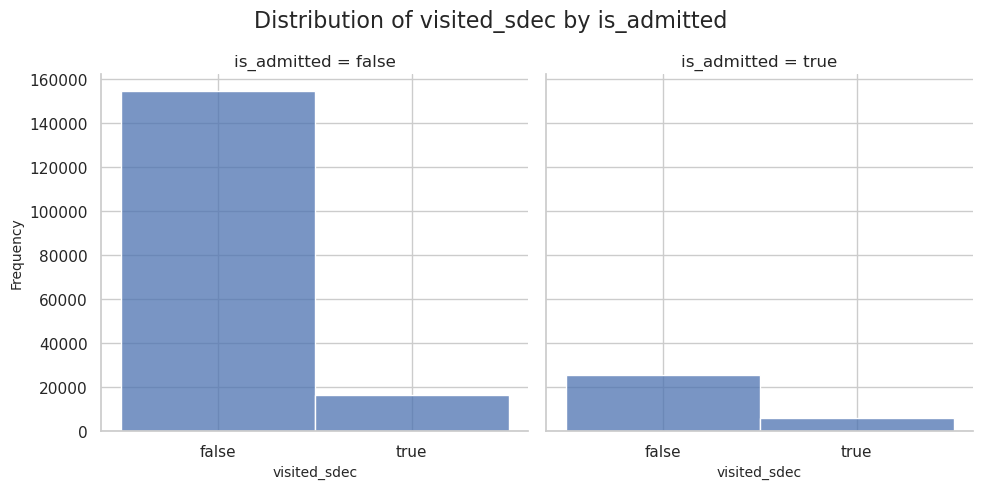

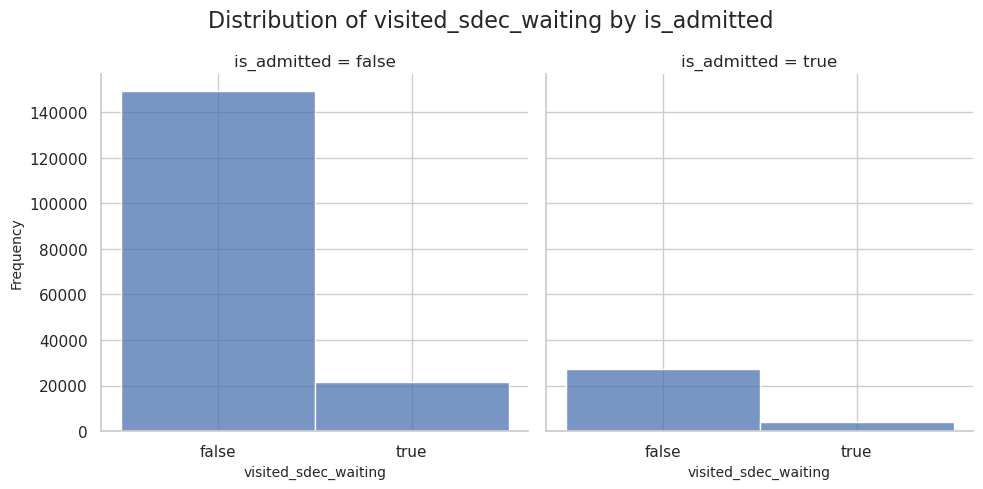

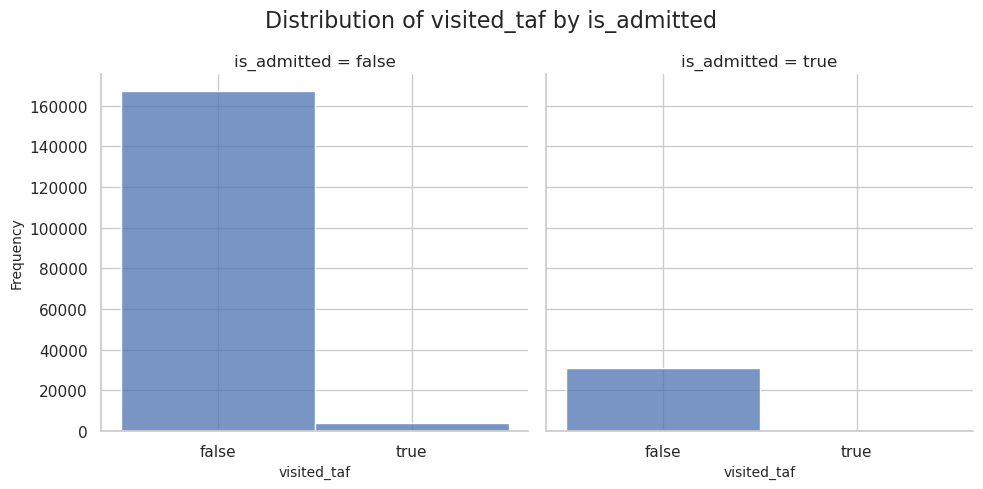

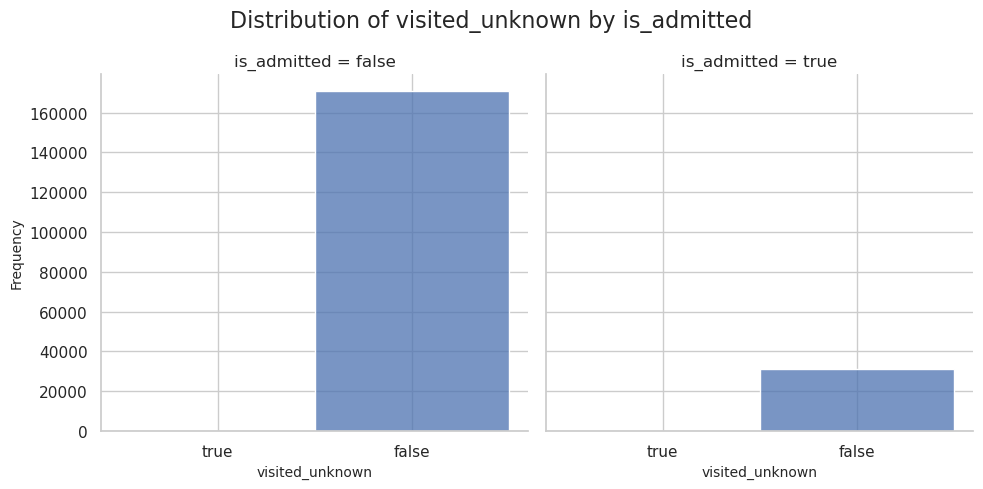

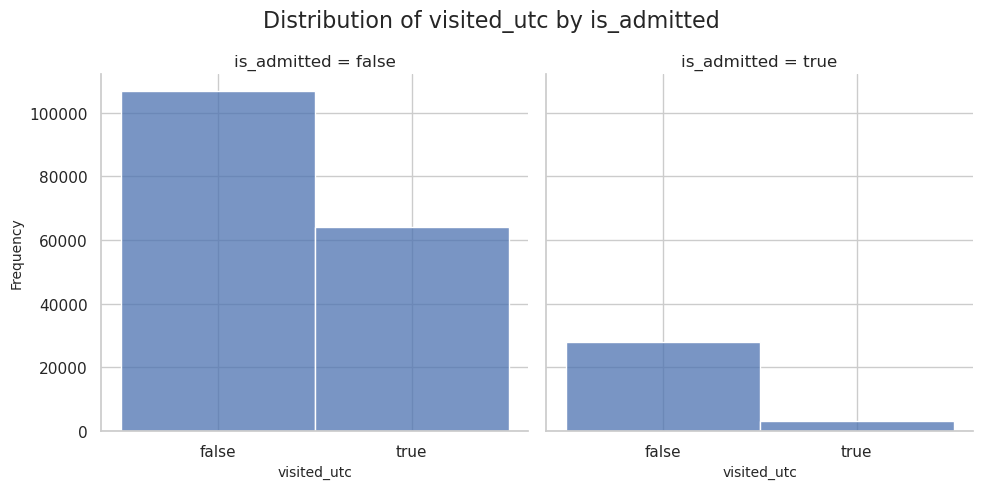

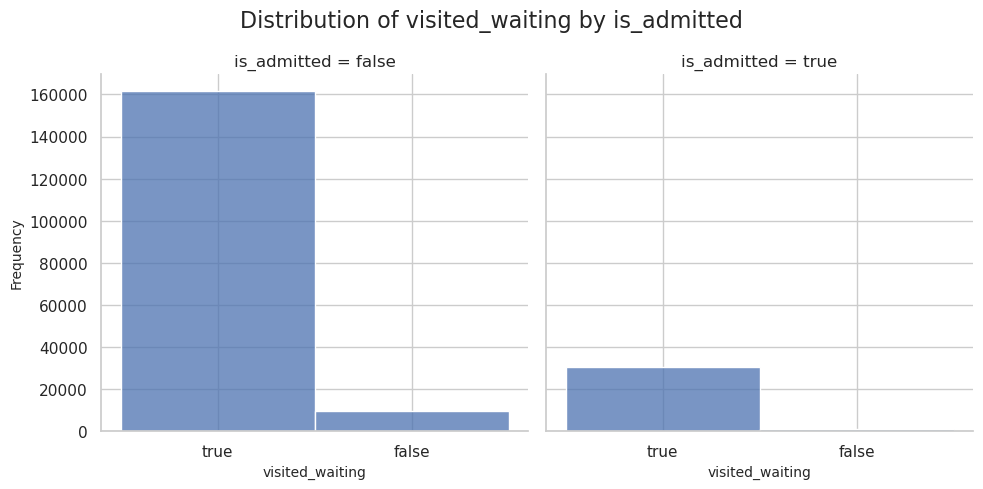

In [114]:
for col_name in dict_cols['location'][1:]:
    plot_distributions(df, col_name, 'is_admitted', plot_type='hist')

### Observations variables

In [110]:
dict_cols['observations']

['num_obs_pulse',
 'num_obs_air_or_oxygen',
 'num_obs_level_of_consciousness',
 'num_obs_uclh_ed_manchester_triage_calculated_acuity',
 'num_obs_uclh_ed_manchester_triage_objective_pain_score',
 'num_obs_uclh_ed_manchester_triage_subjective_pain_score',
 'num_obs_temperature',
 'num_obs_blood_pressure',
 'num_obs_glasgow_coma_scale_best_motor_response',
 'num_obs_news_score_result',
 'num_obs_oxygen_delivery_method',
 'num_obs_oxygen_flow_rate',
 'num_obs_pupil_reaction_right',
 'num_obs_uclh_sskin_areas_observed',
 'latest_obs_pulse',
 'latest_obs_respirations',
 'latest_obs_level_of_consciousness',
 'latest_obs_uclh_ed_manchester_triage_calculated_acuity',
 'latest_obs_uclh_ed_manchester_triage_objective_pain_score',
 'latest_obs_temperature',
 'latest_obs_news_score_result']

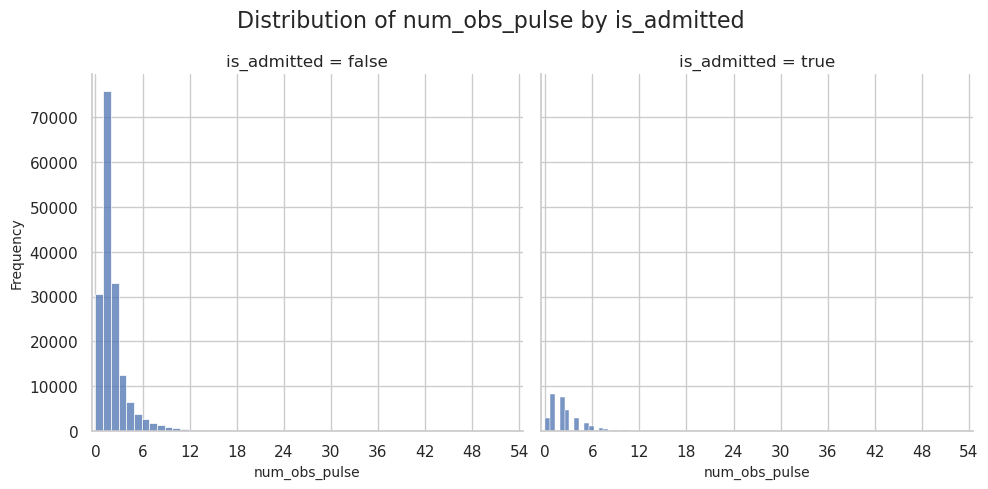

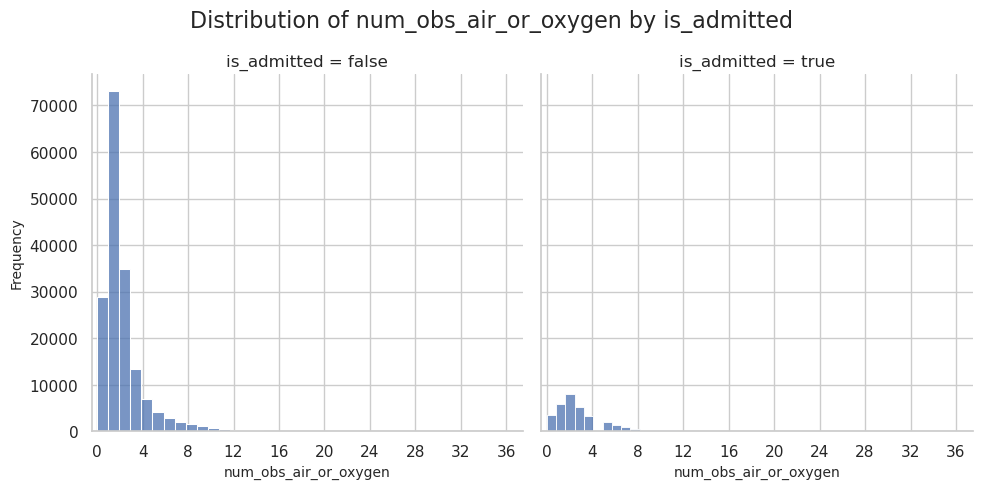

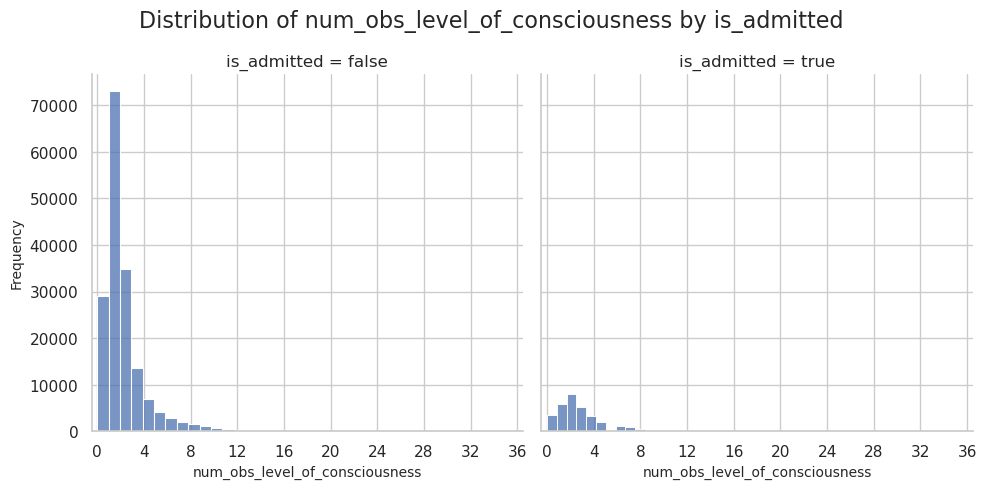

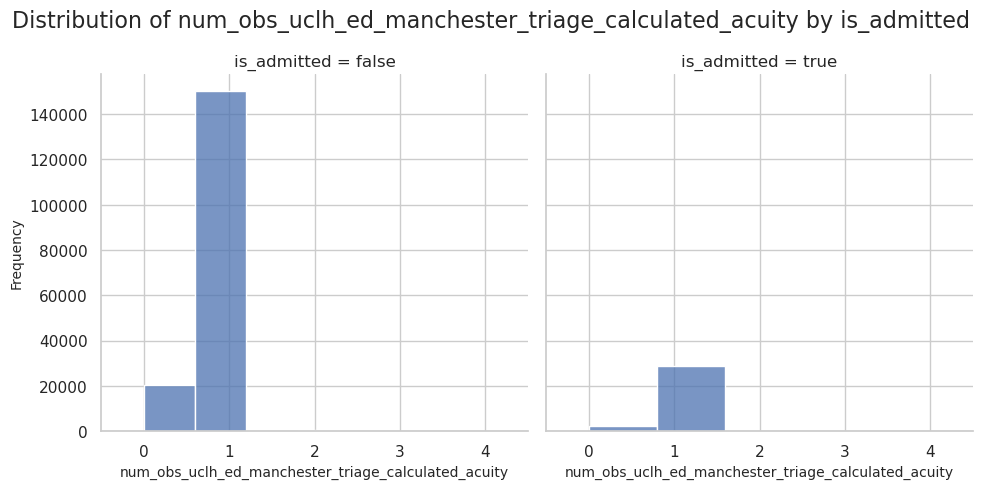

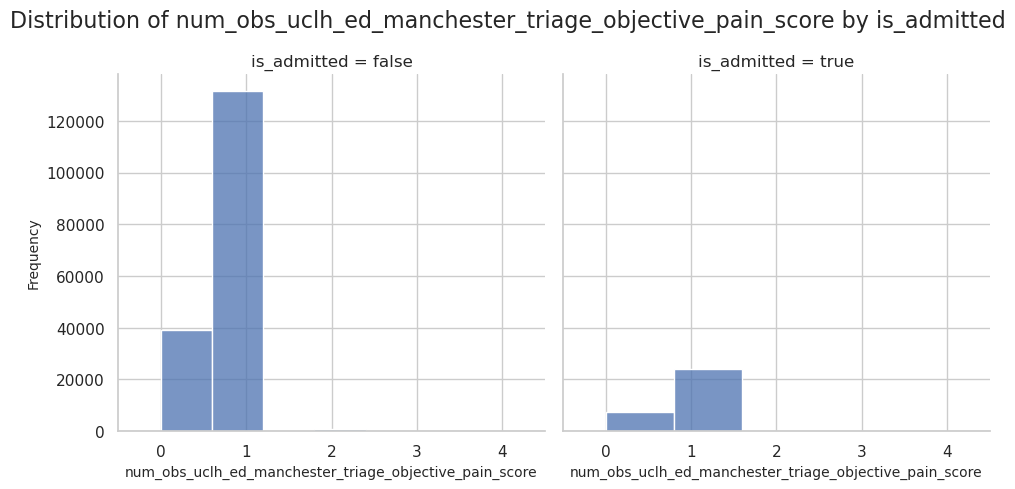

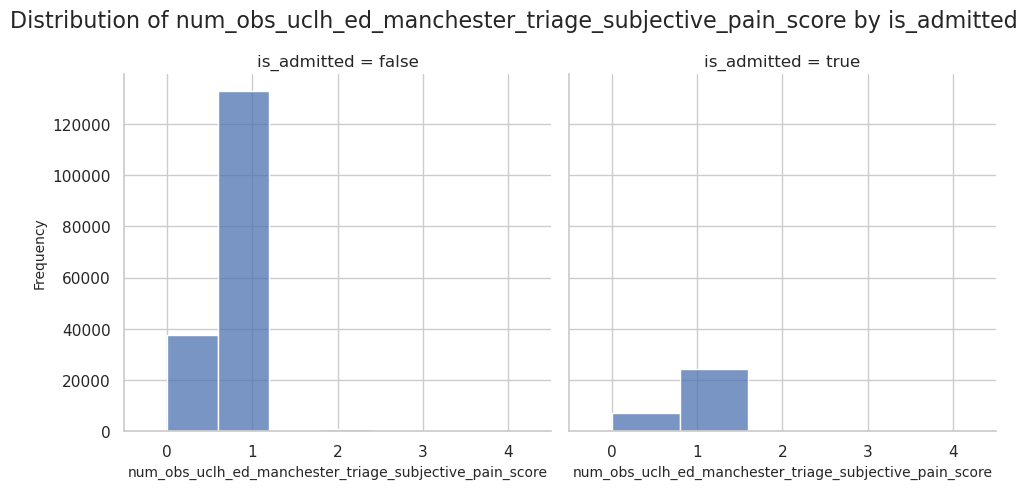

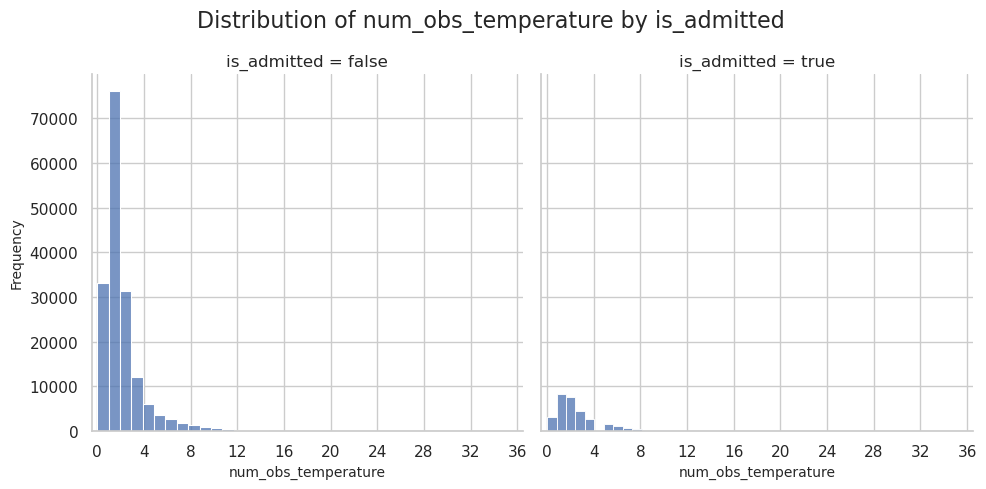

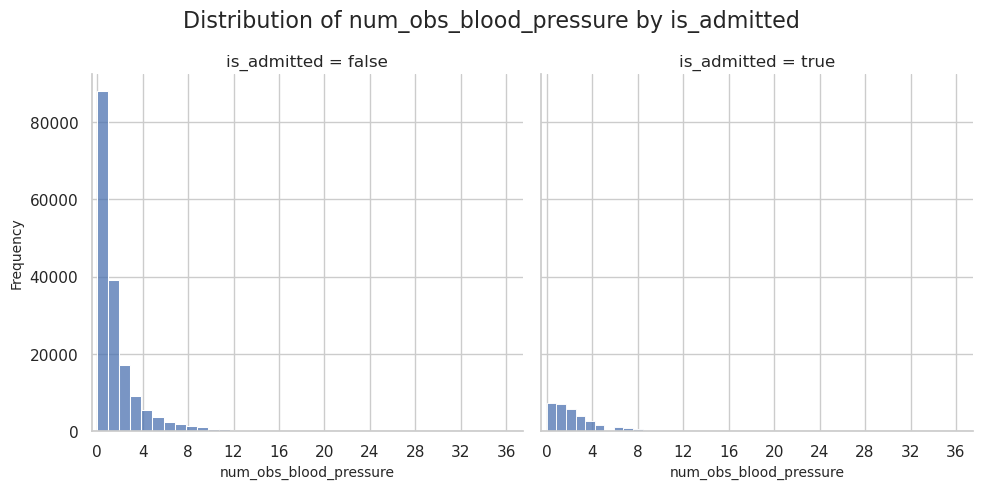

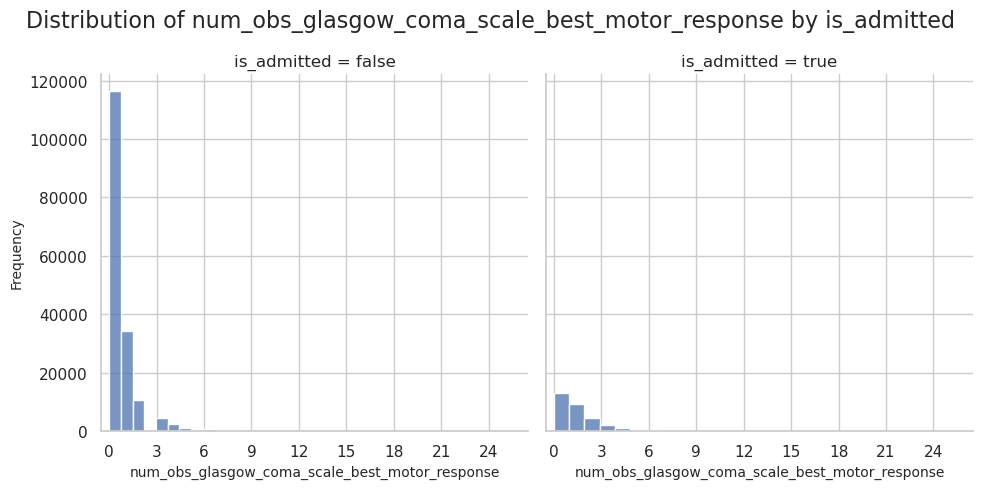

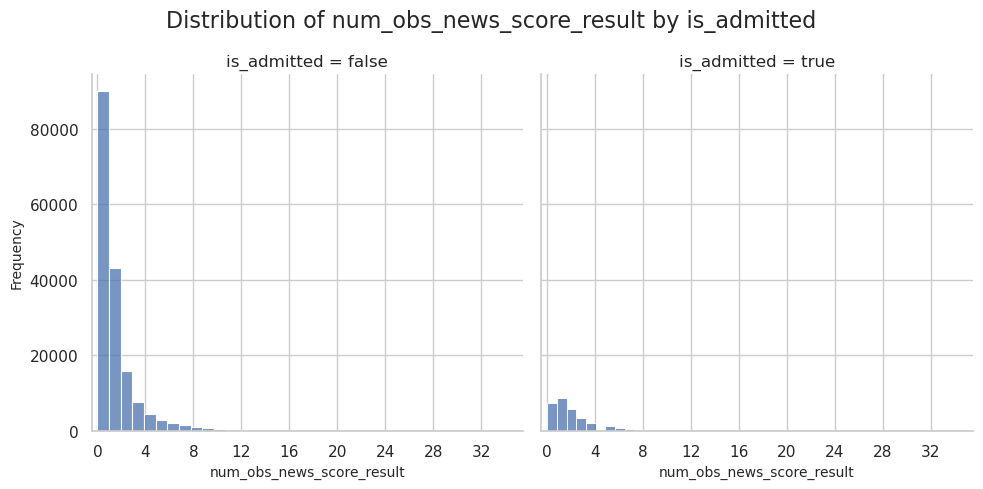

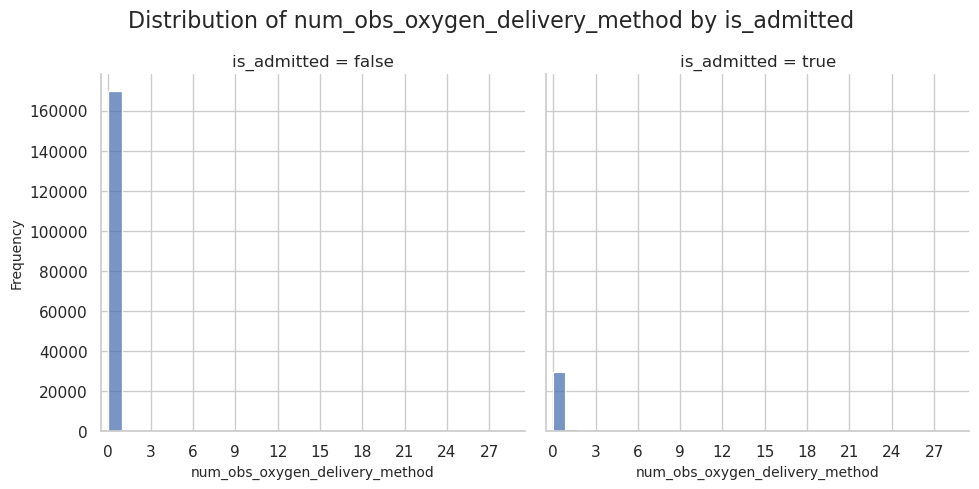

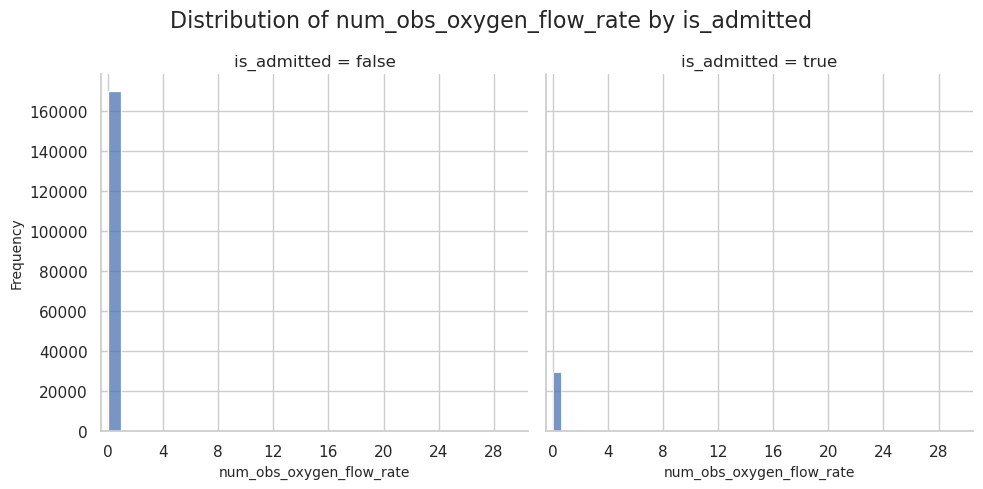

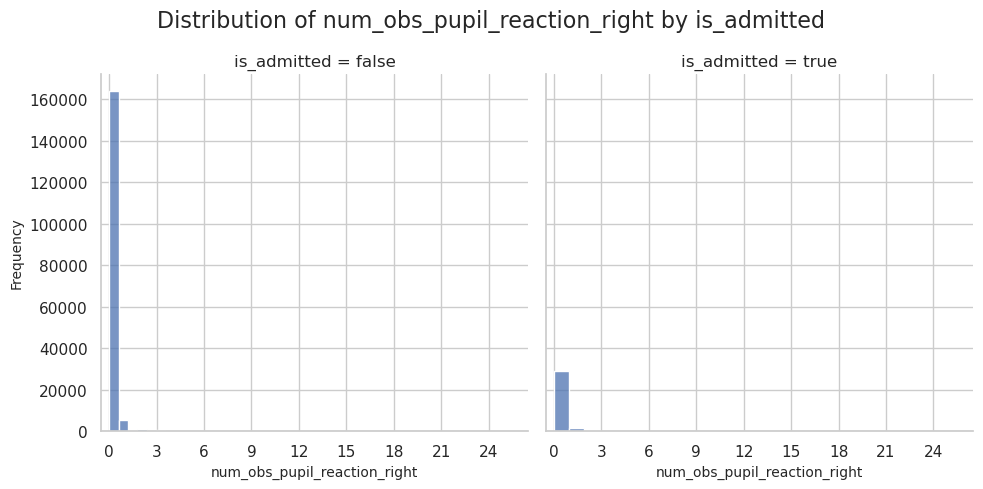

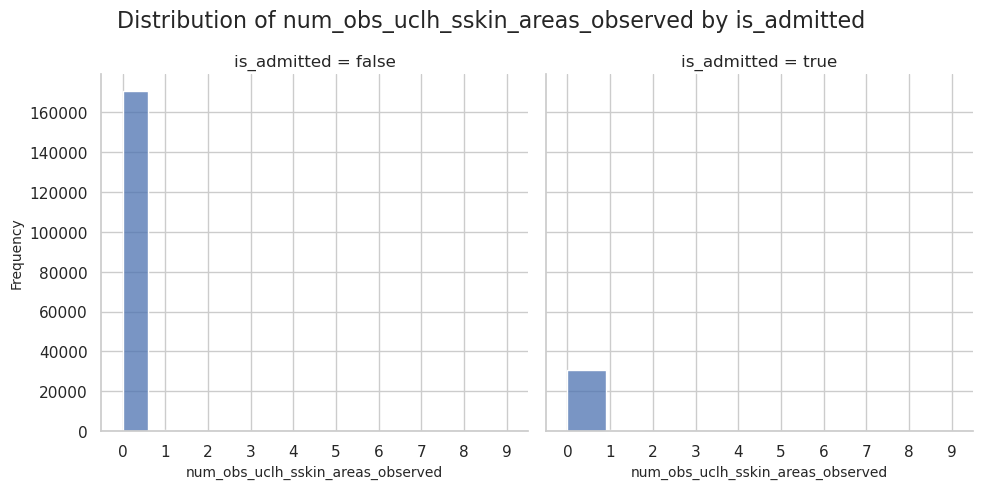

In [115]:
for col_name in [item for item in dict_cols['observations'] if str(item).startswith('num')]:
    plot_distributions(df, col_name, 'is_admitted', plot_type='hist', is_discrete = True)

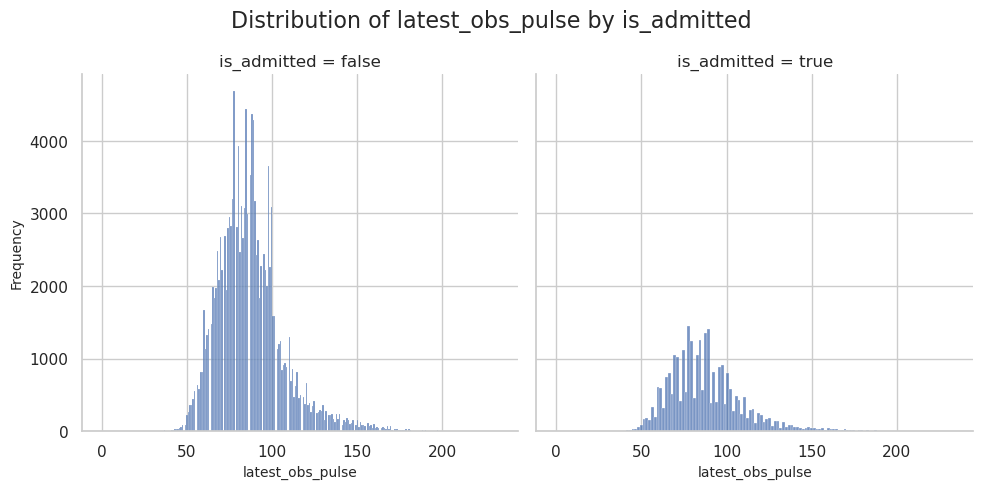

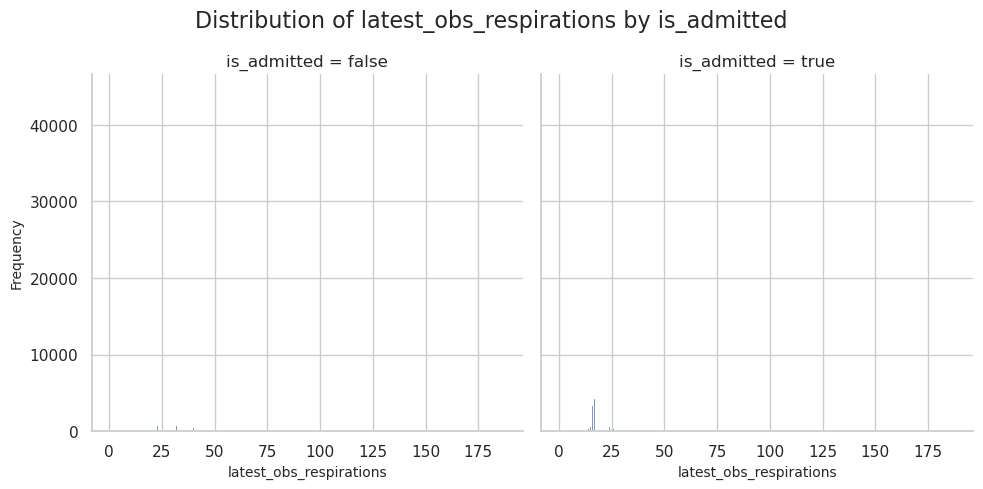

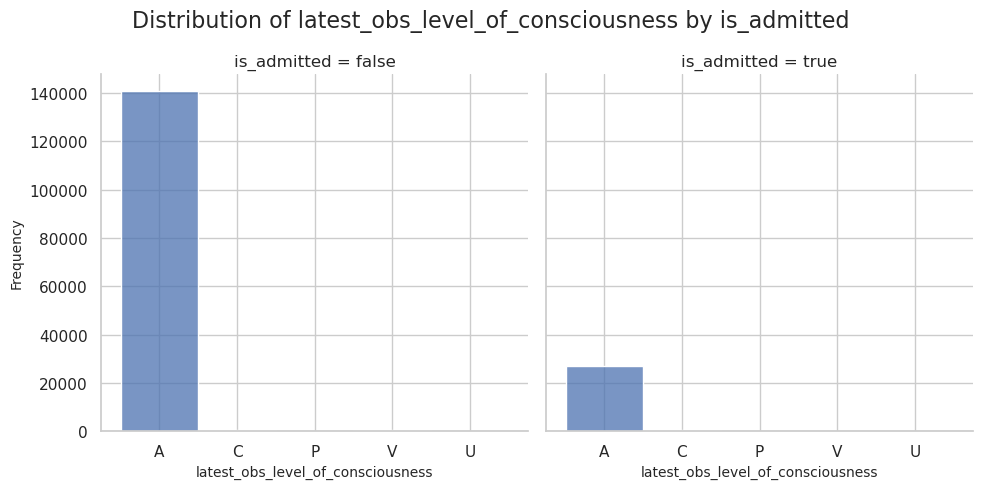

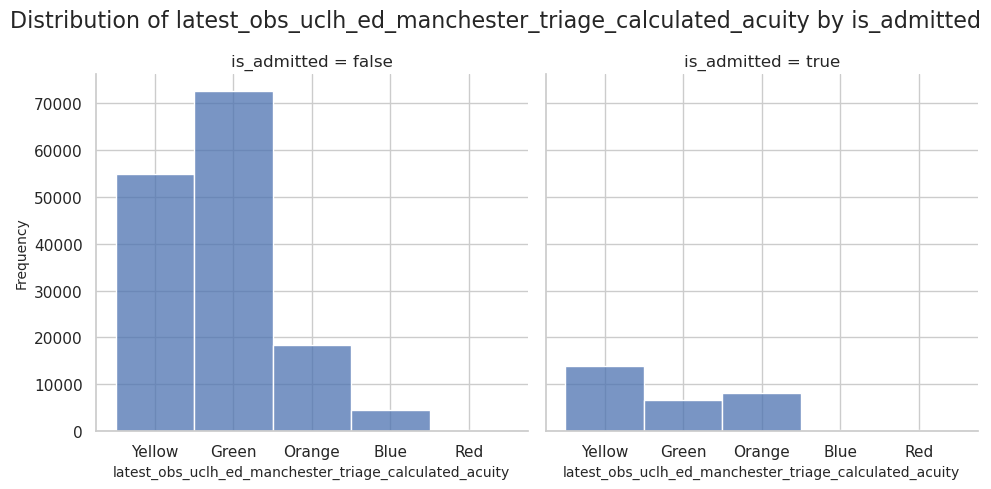

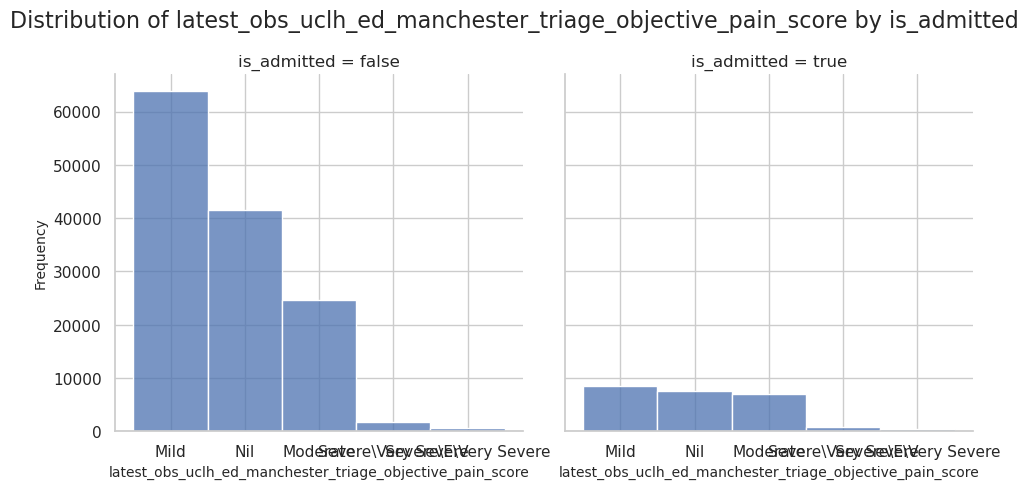

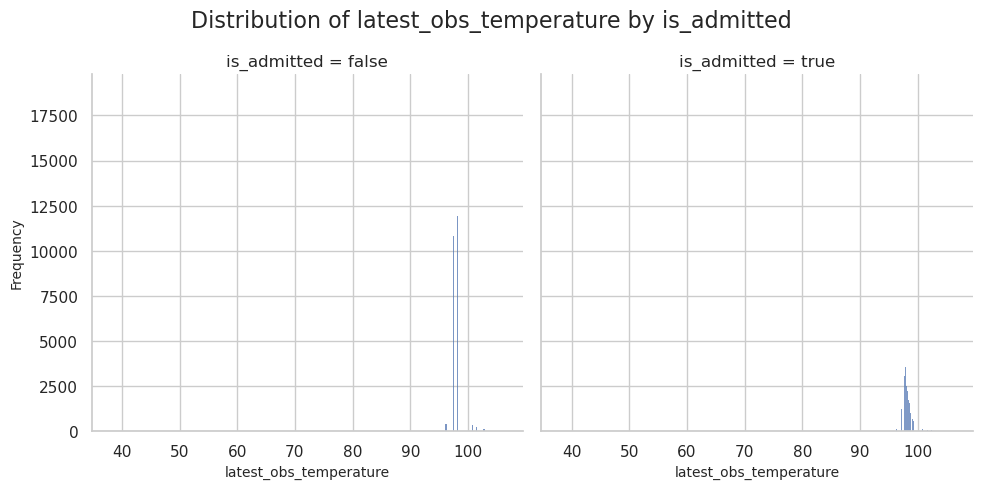

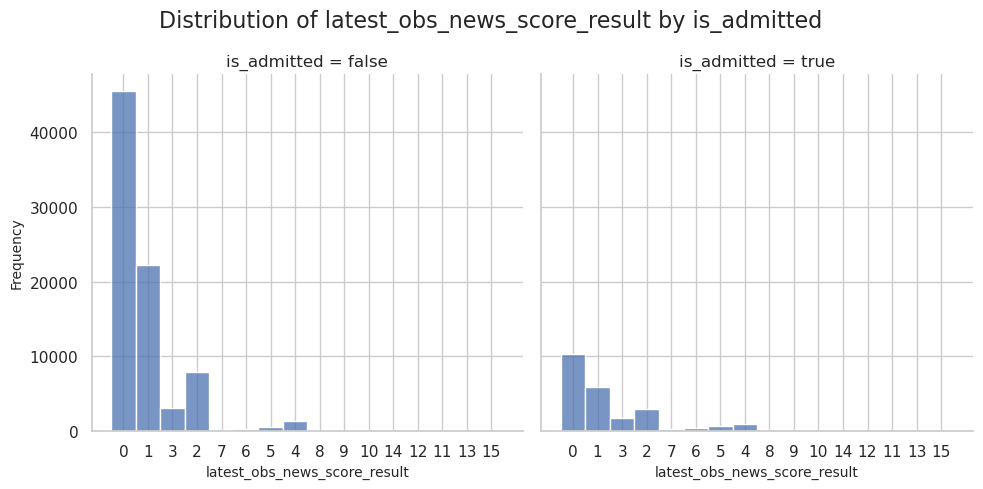

In [116]:
for col_name in [item for item in dict_cols['observations'] if str(item).startswith('latest')]:
    plot_distributions(df, col_name, 'is_admitted', plot_type='hist')

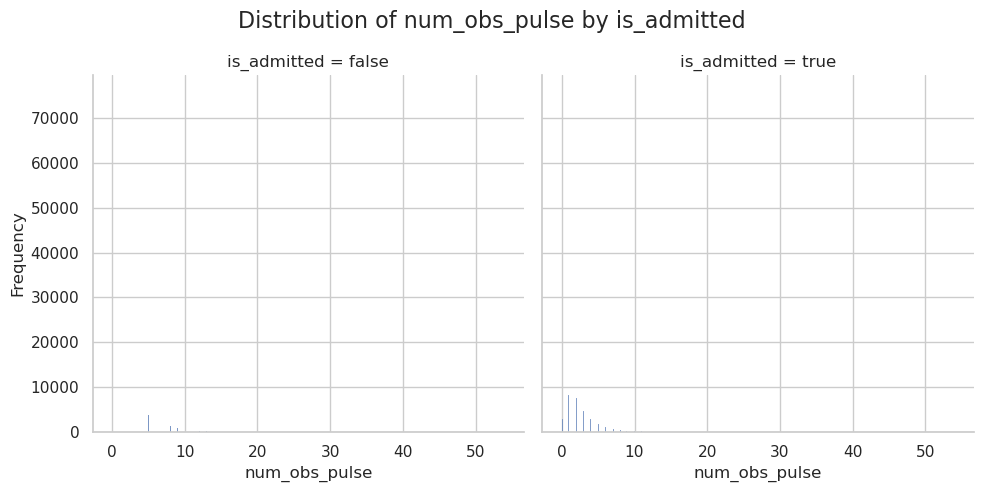

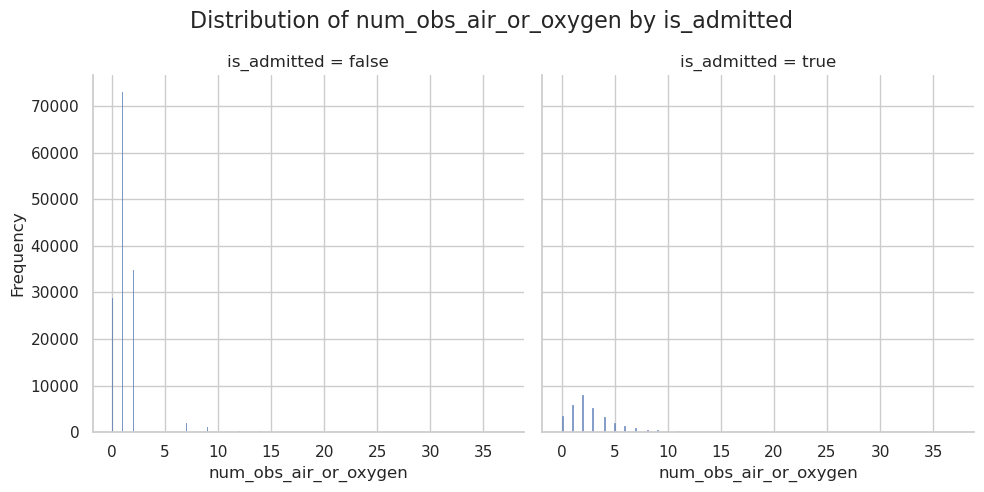

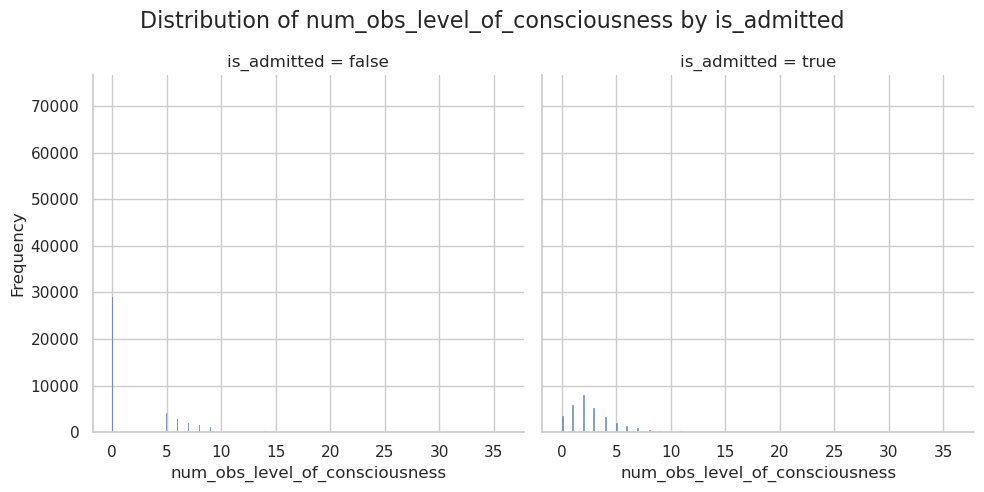

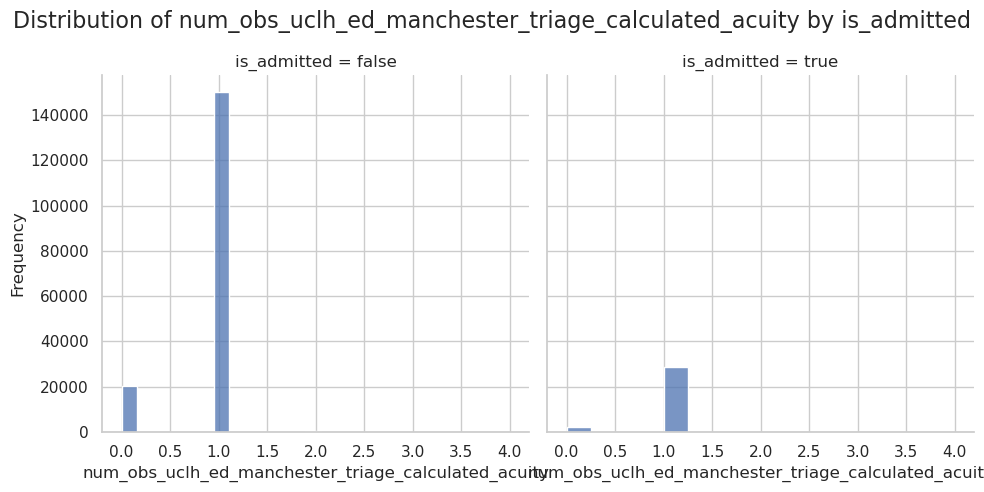

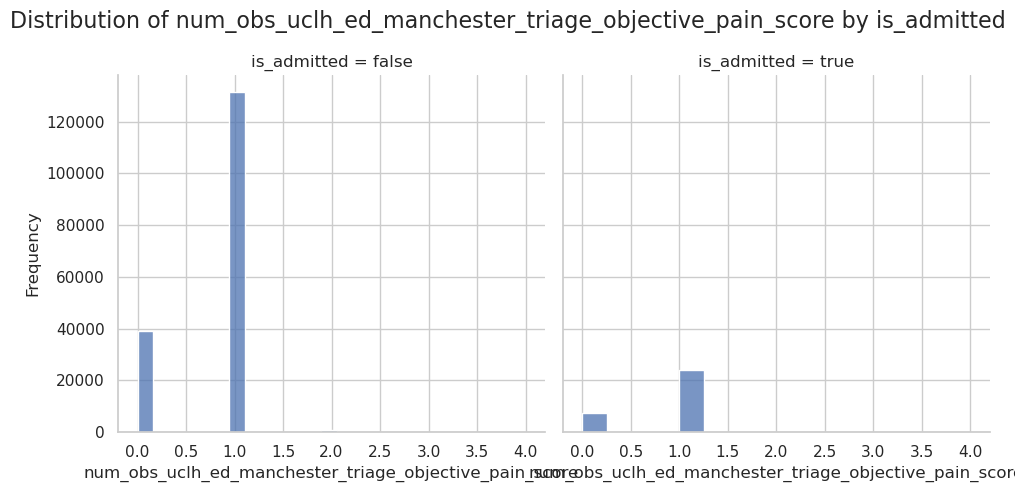

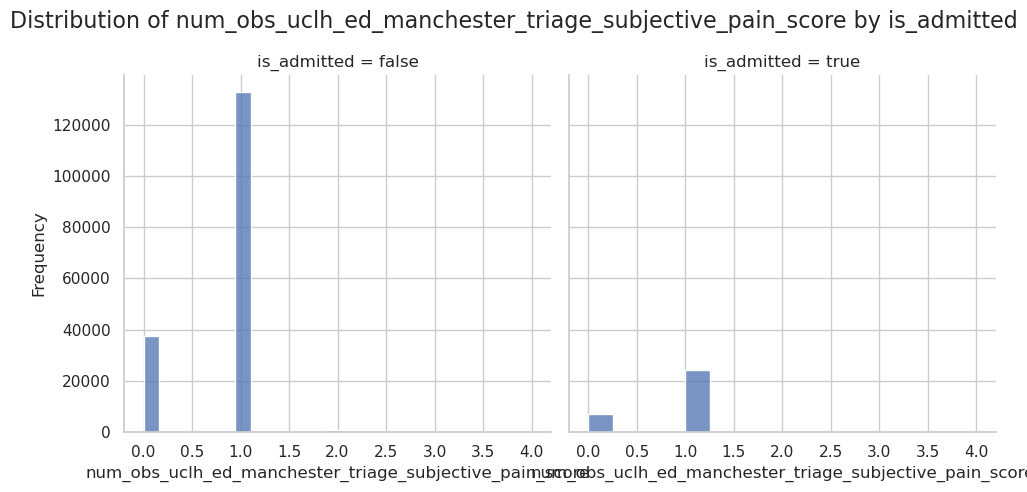

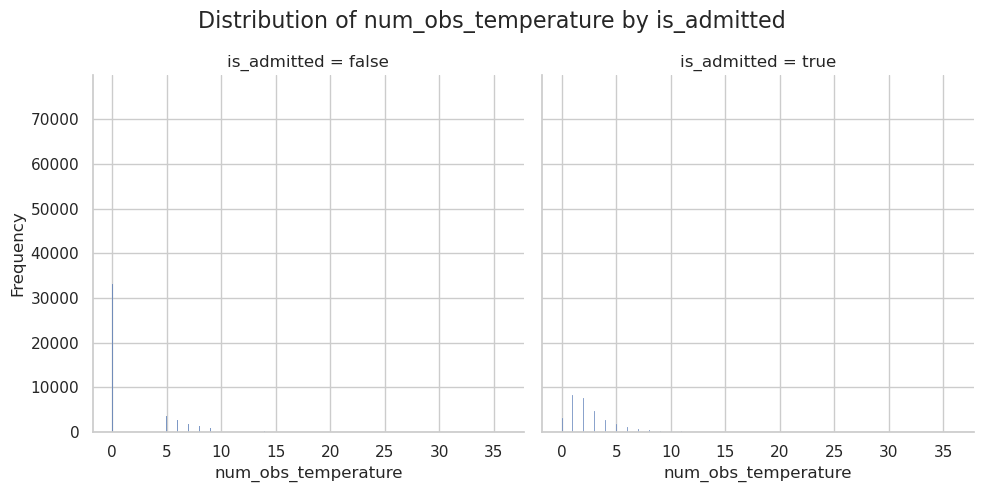

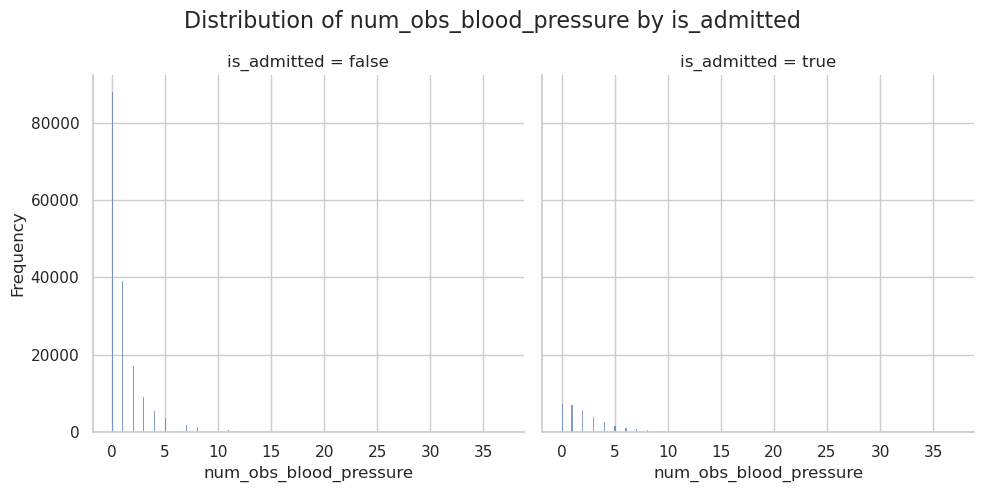

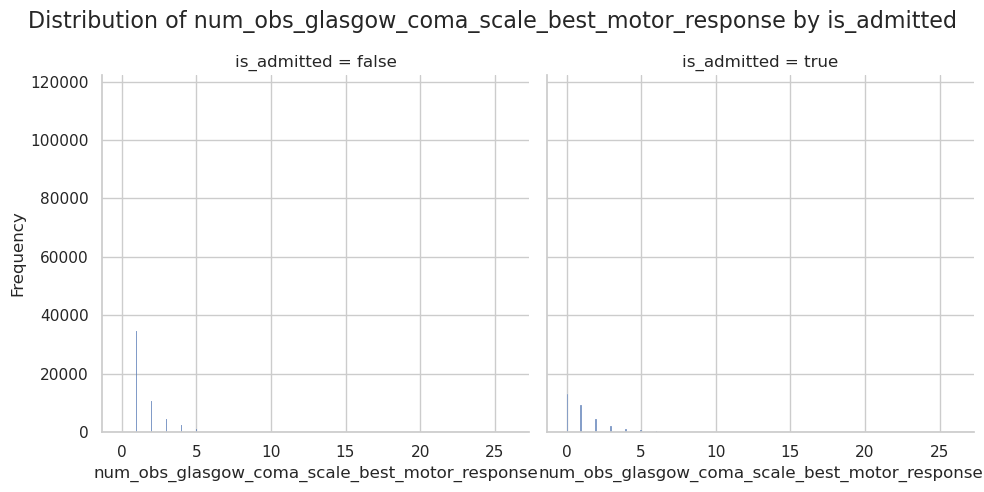

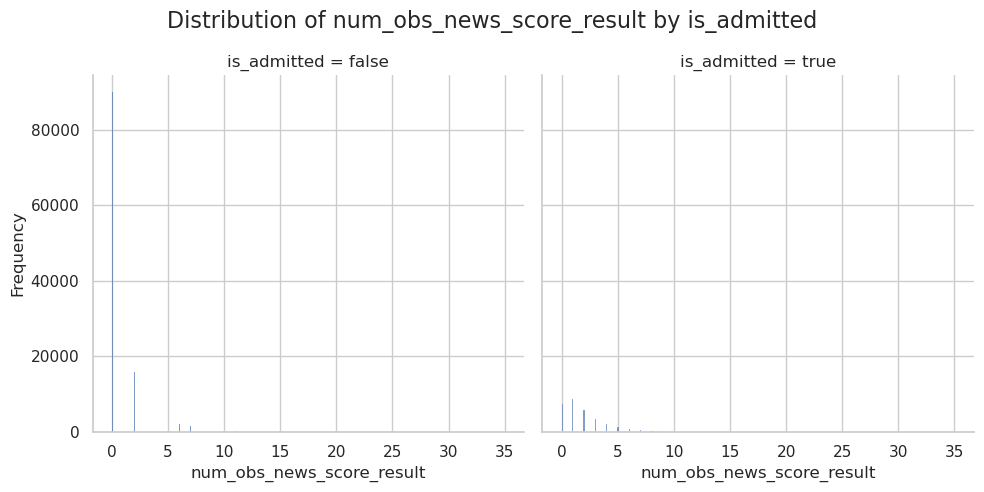

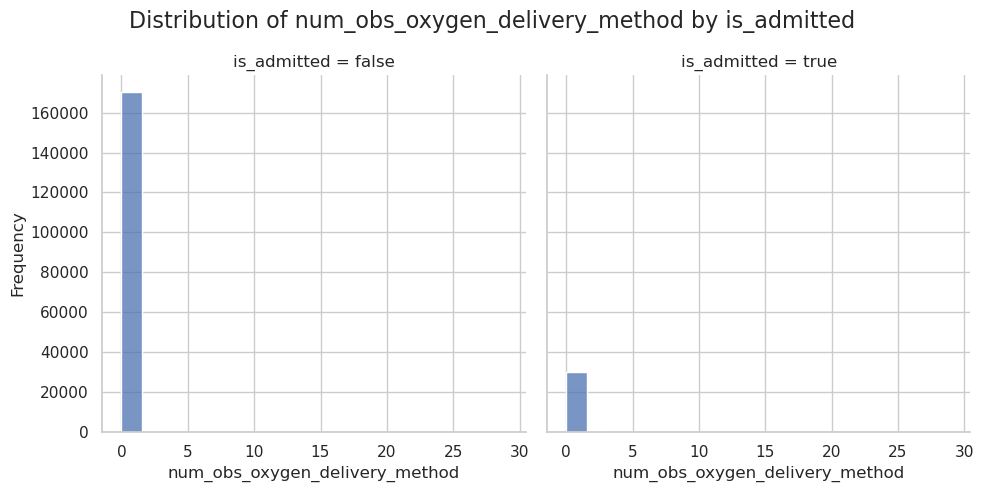

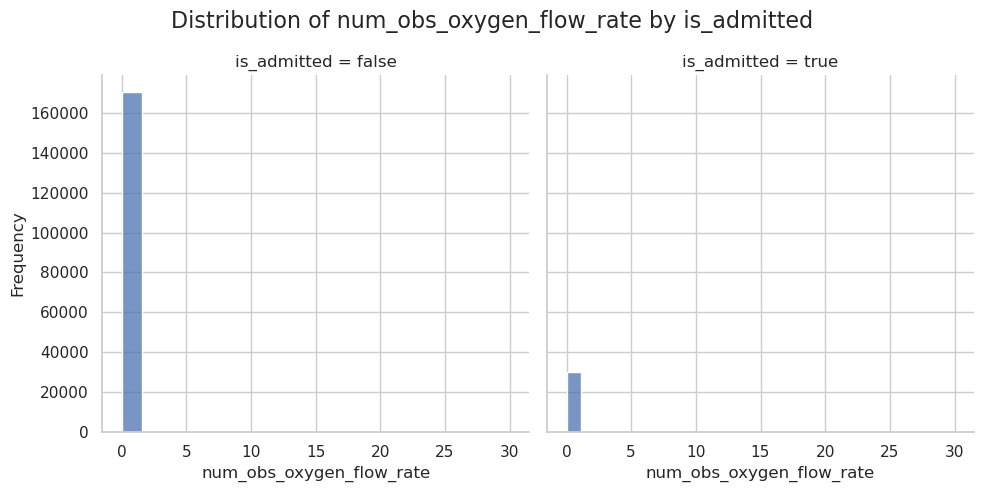

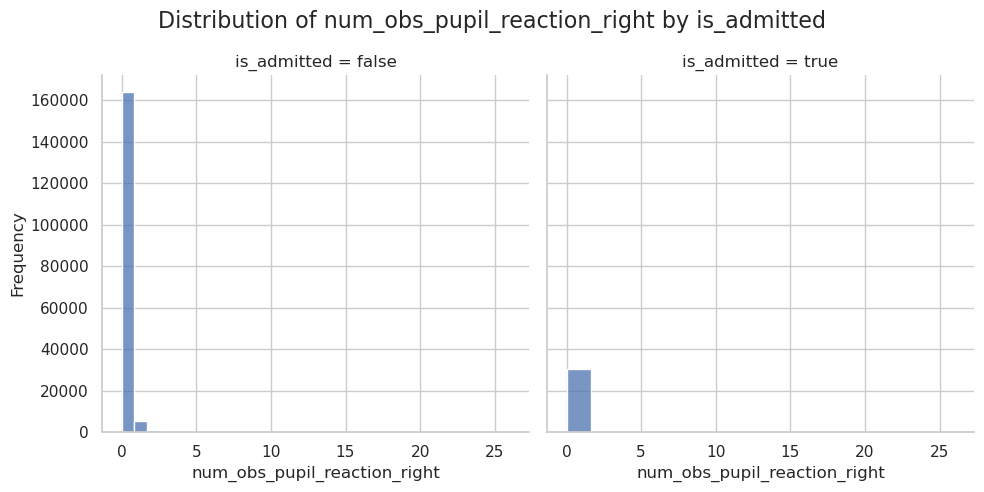

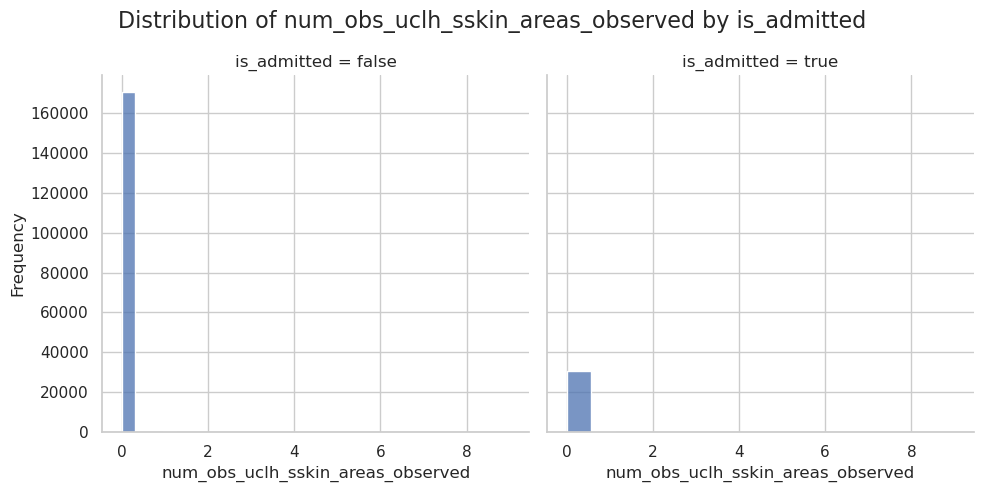

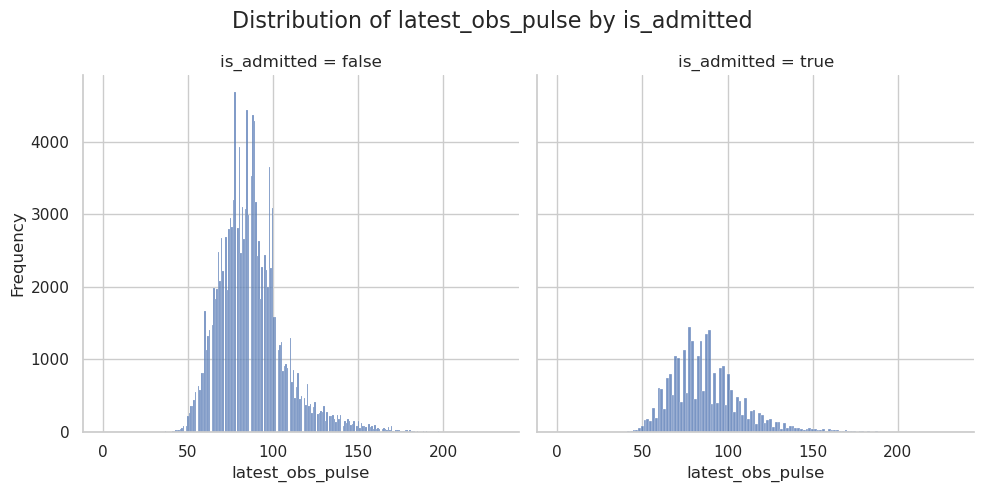

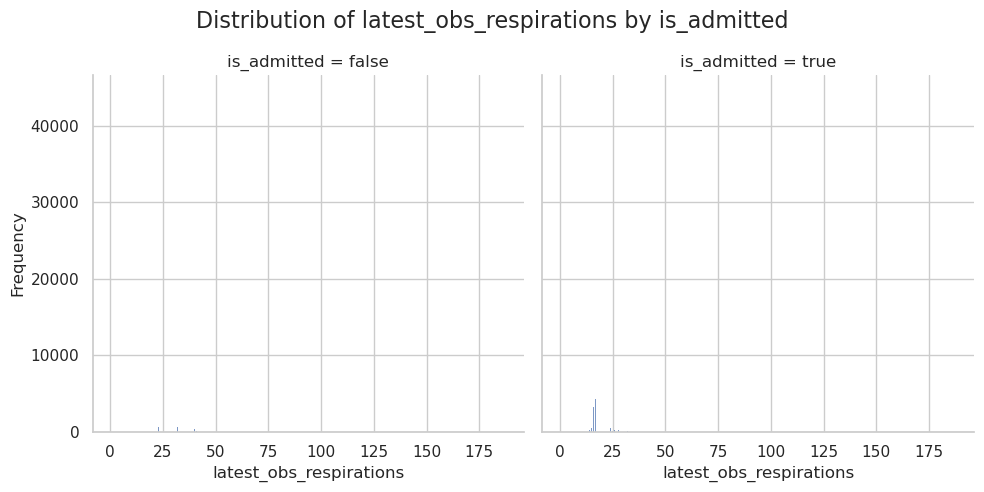

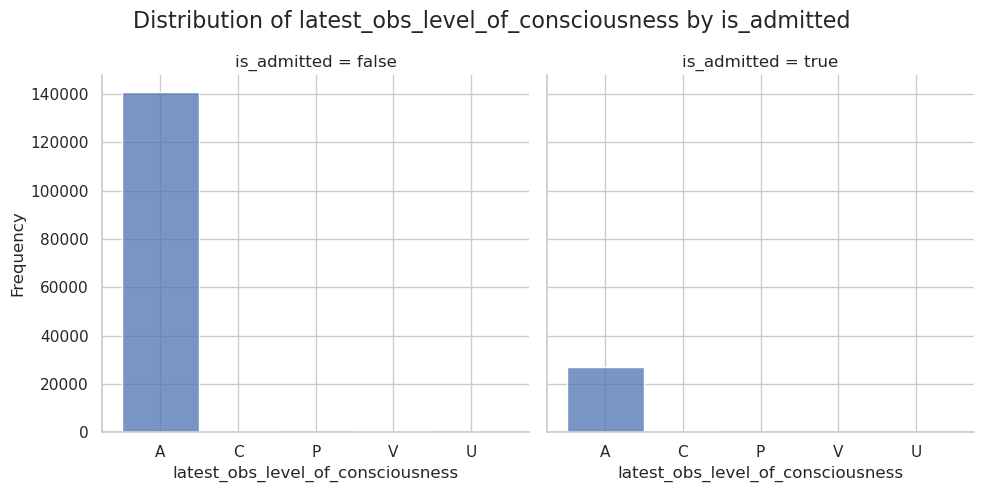

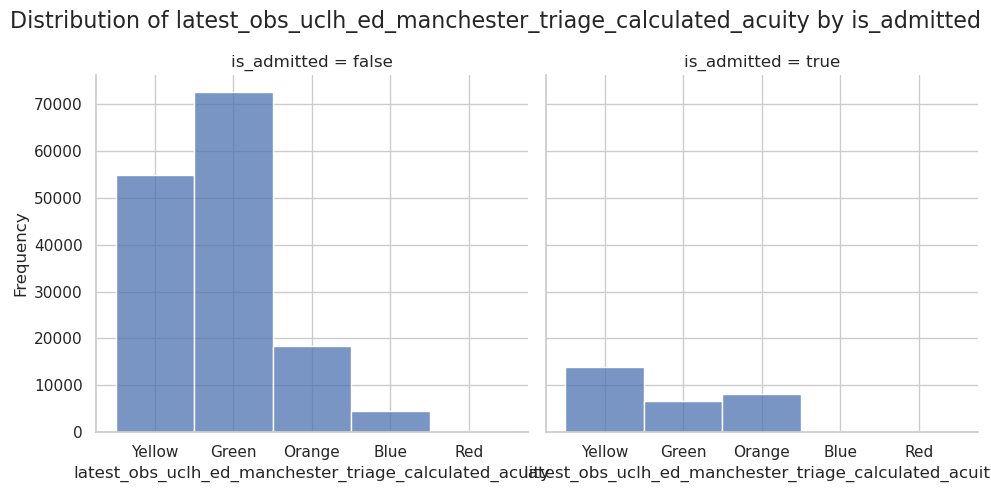

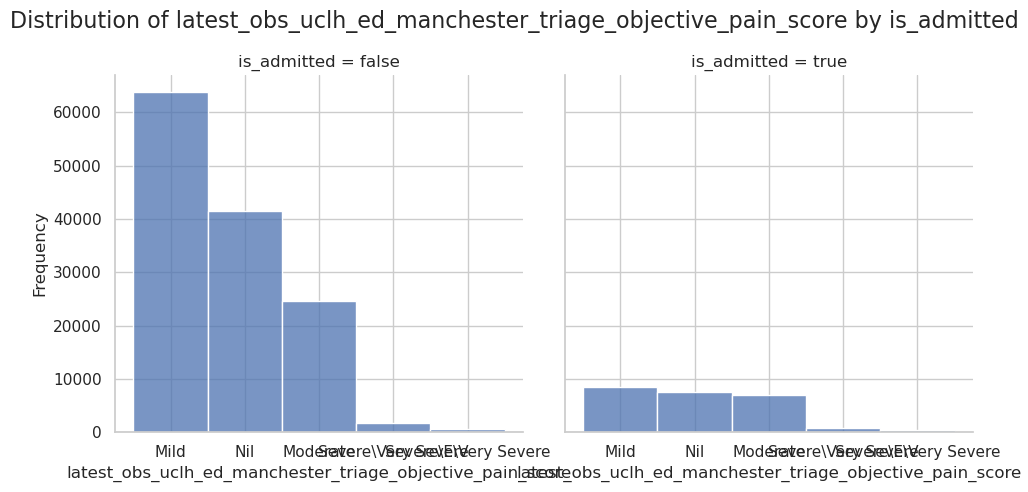

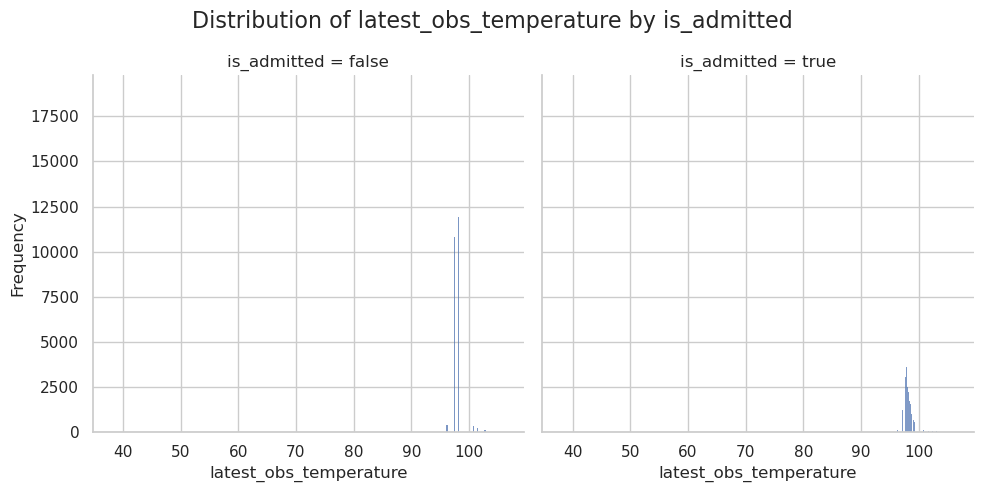

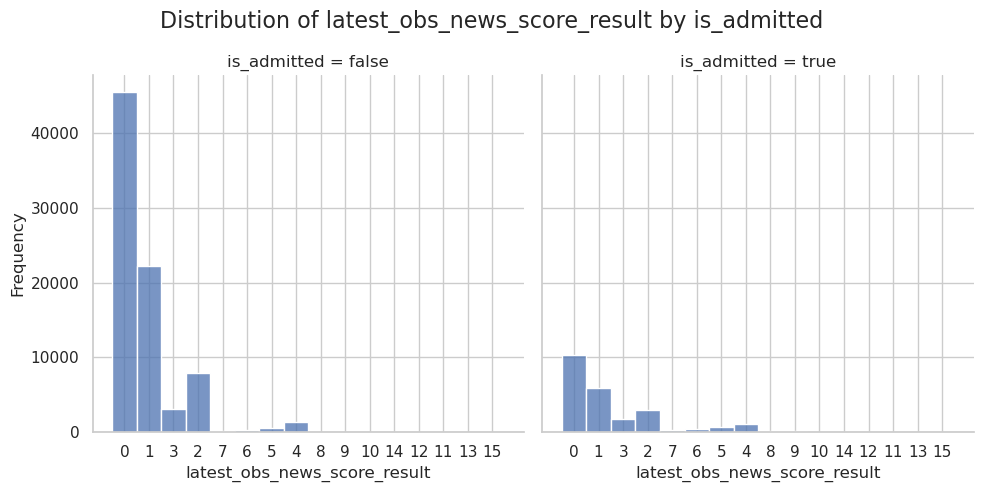

In [98]:
for col_name in dict_cols['observations']:
    plot_distributions(df, col_name, 'is_admitted', plot_type='hist')

### Lab variables

In [117]:
dict_cols['lab orders and results']

['lab_orders_bc',
 'lab_orders_bon',
 'lab_orders_crp',
 'lab_orders_csnf',
 'lab_orders_ddit',
 'lab_orders_ncov',
 'lab_orders_rflu',
 'lab_orders_xcov',
 'latest_lab_results_alb',
 'latest_lab_results_crea',
 'latest_lab_results_hctu',
 'latest_lab_results_htrt',
 'latest_lab_results_k',
 'latest_lab_results_lac',
 'latest_lab_results_na',
 'latest_lab_results_pco2',
 'latest_lab_results_ph',
 'latest_lab_results_wcc',
 'latest_lab_results_hco3']

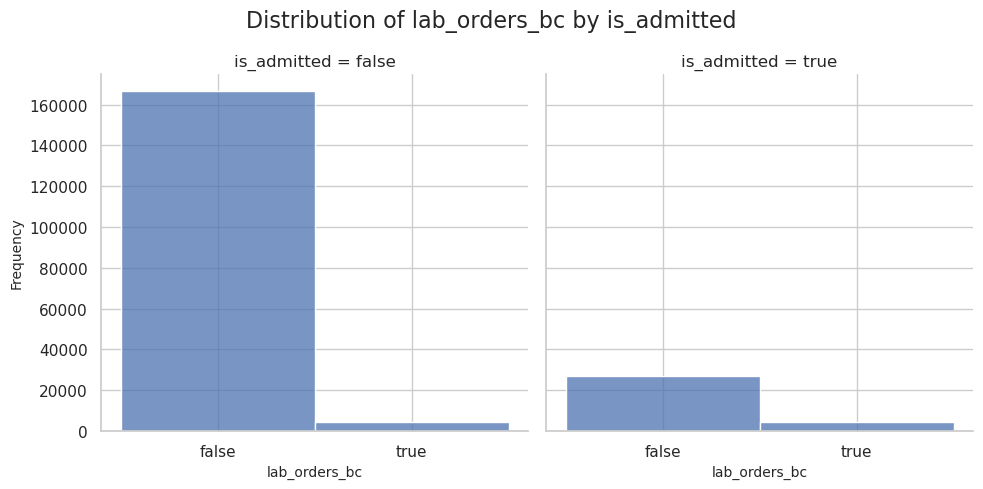

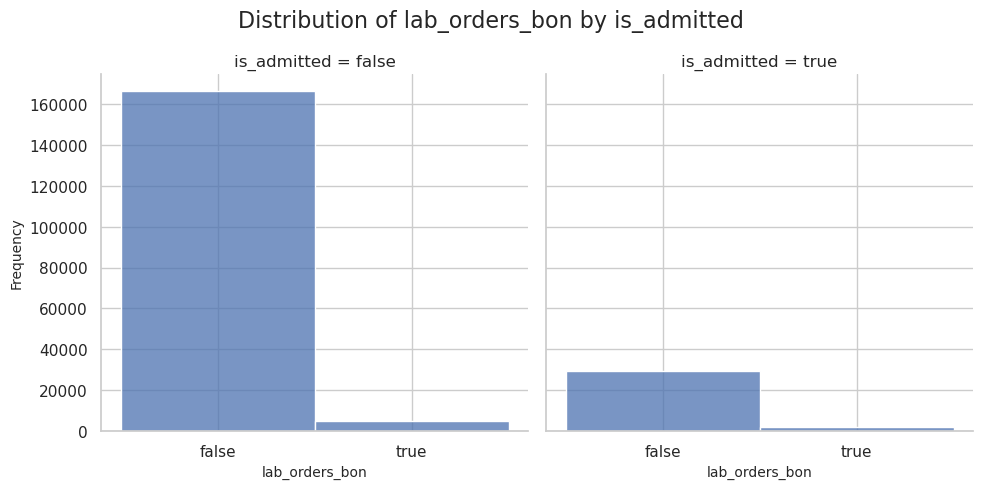

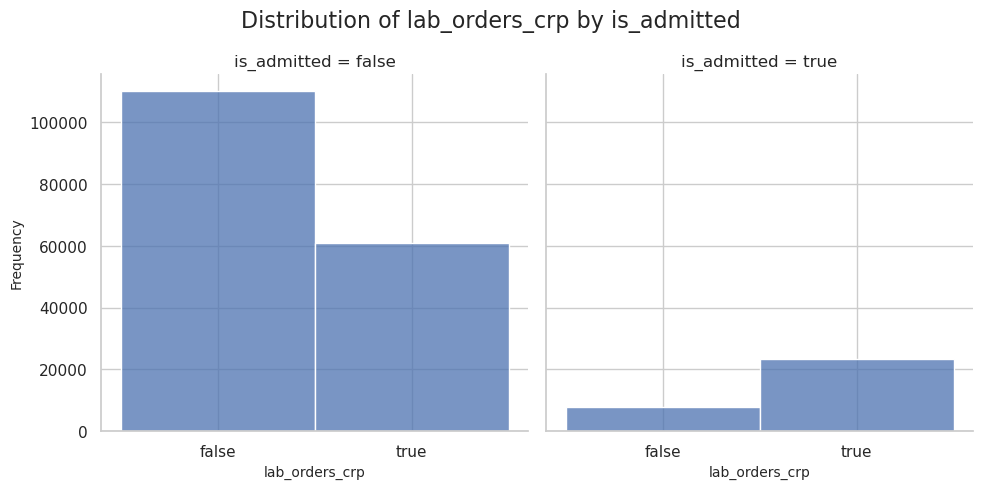

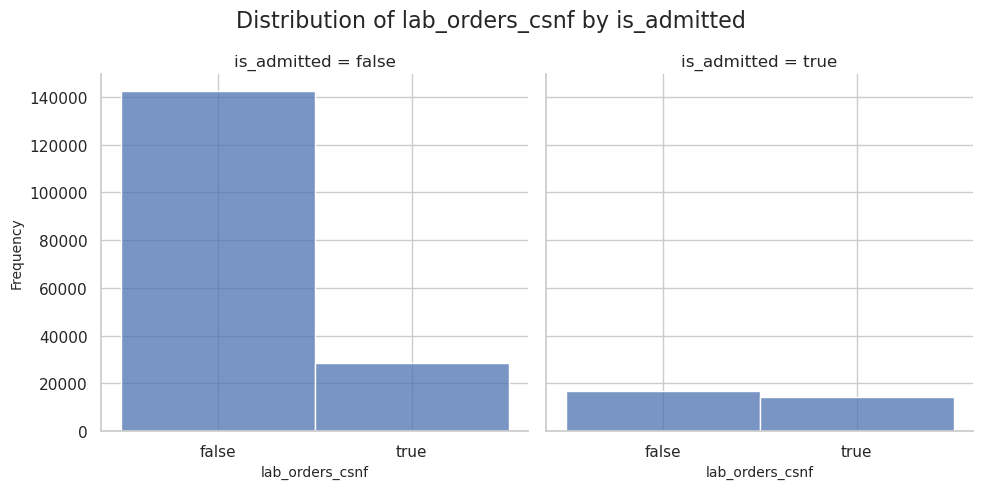

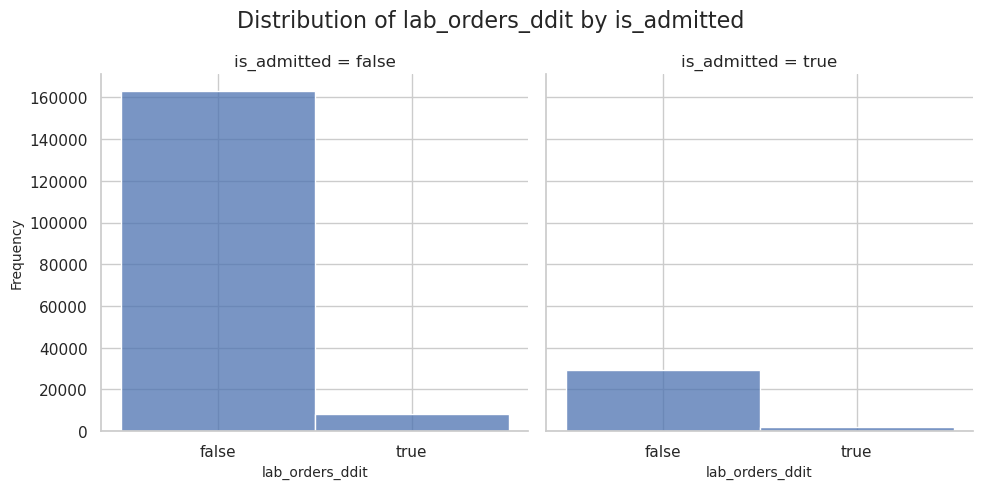

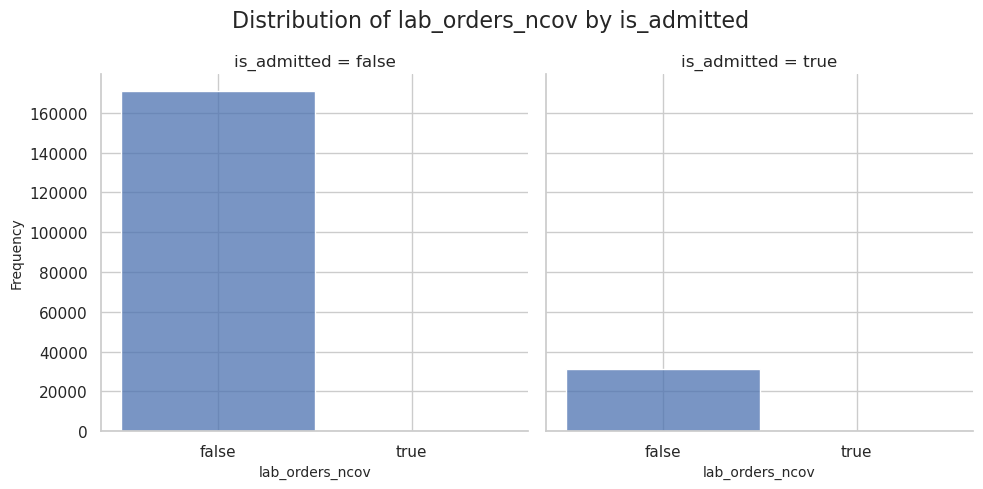

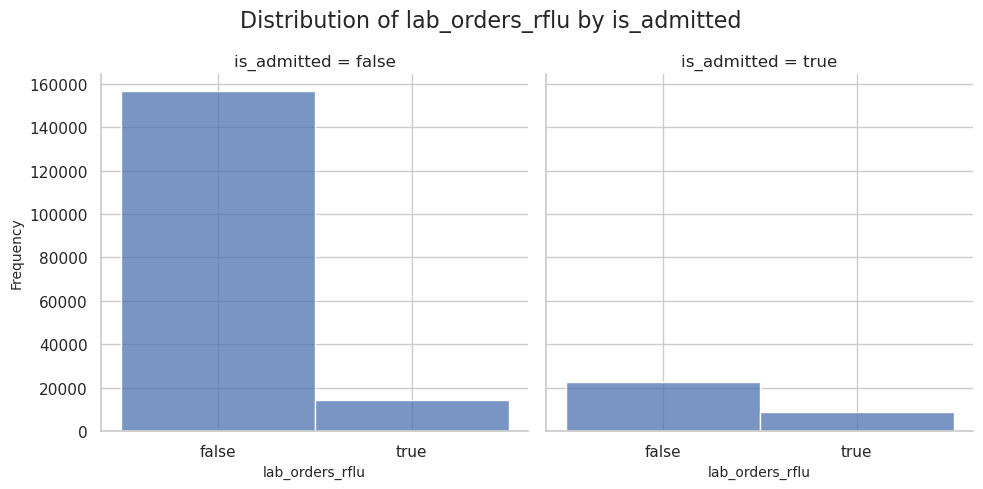

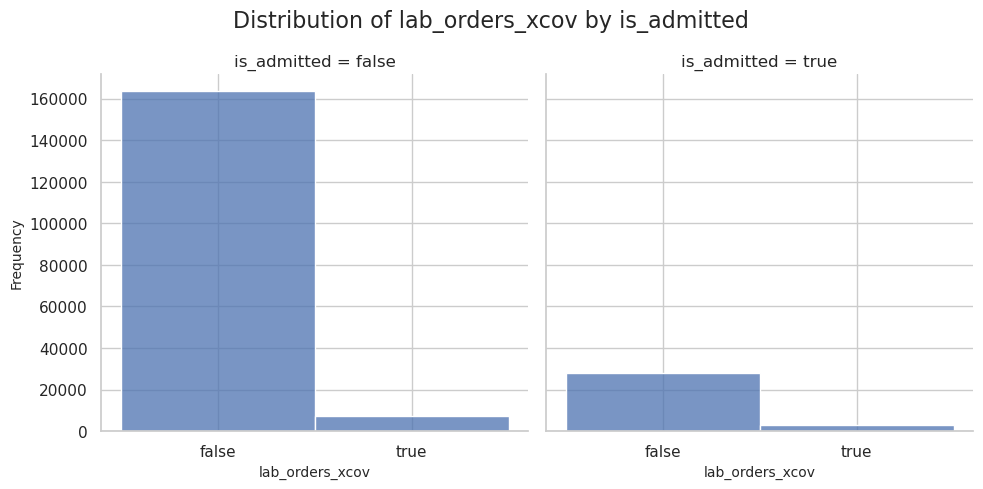

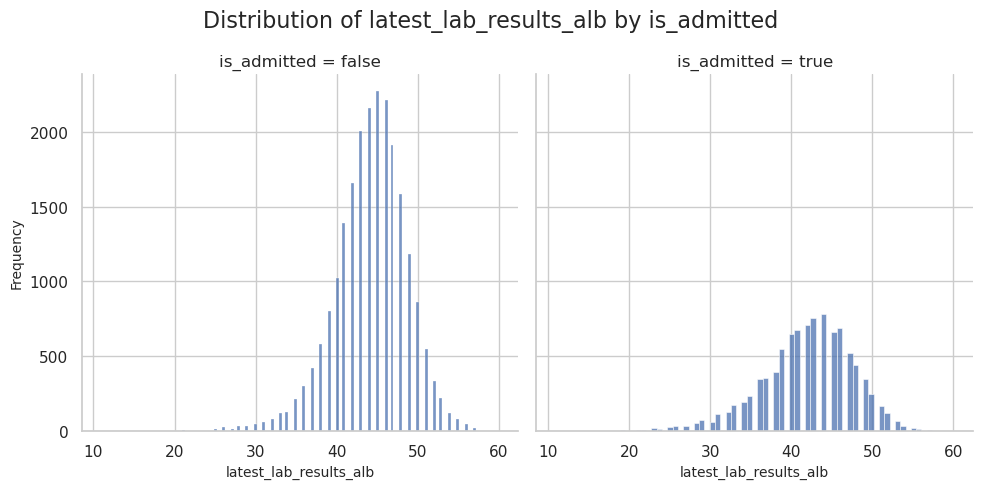

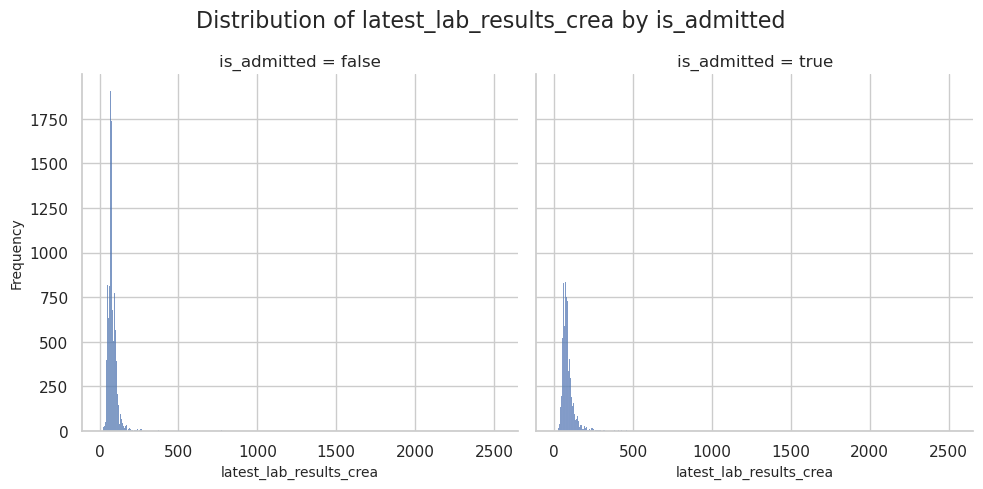

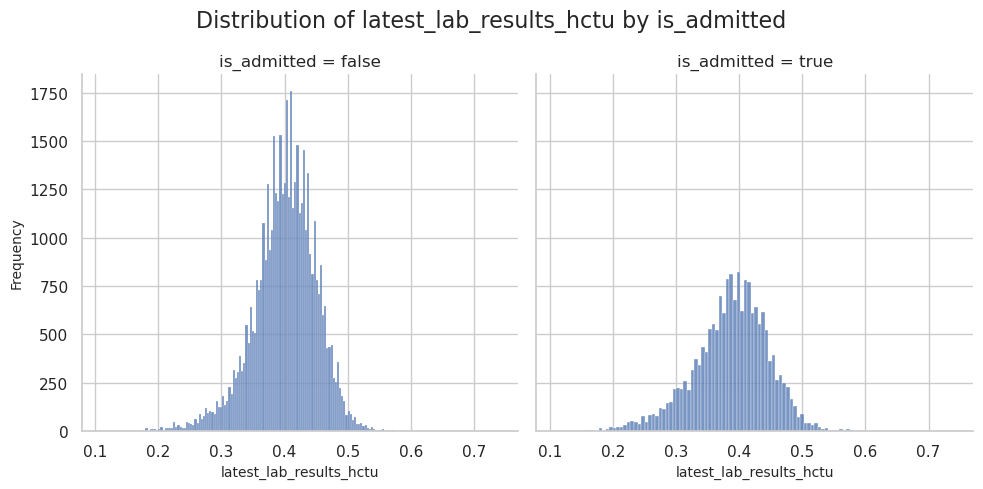

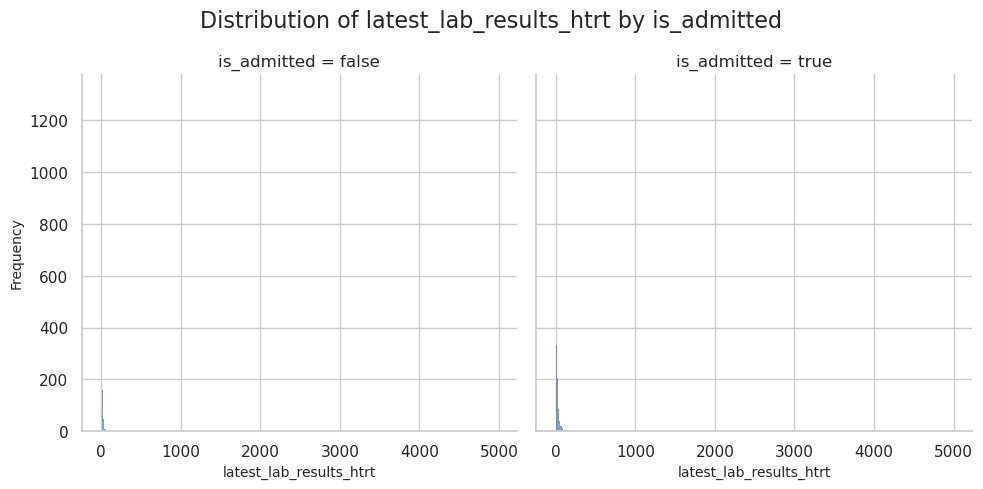

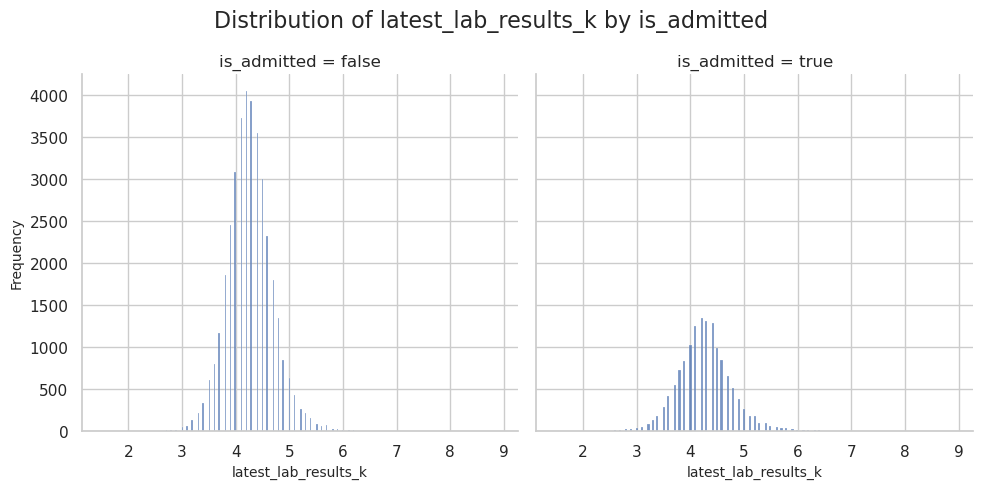

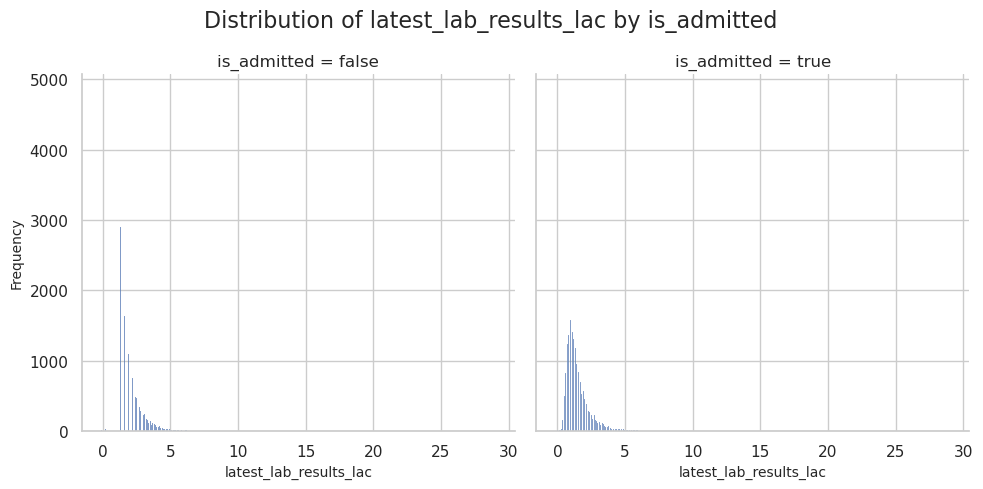

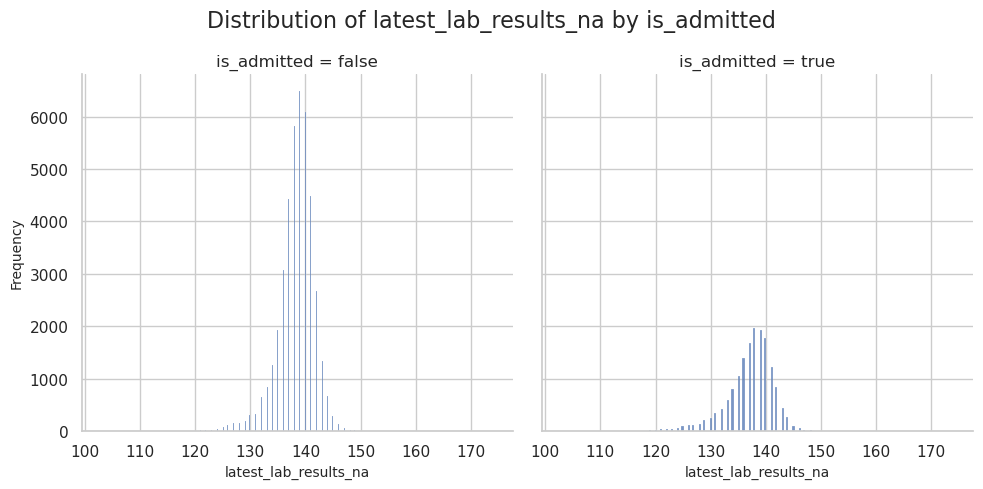

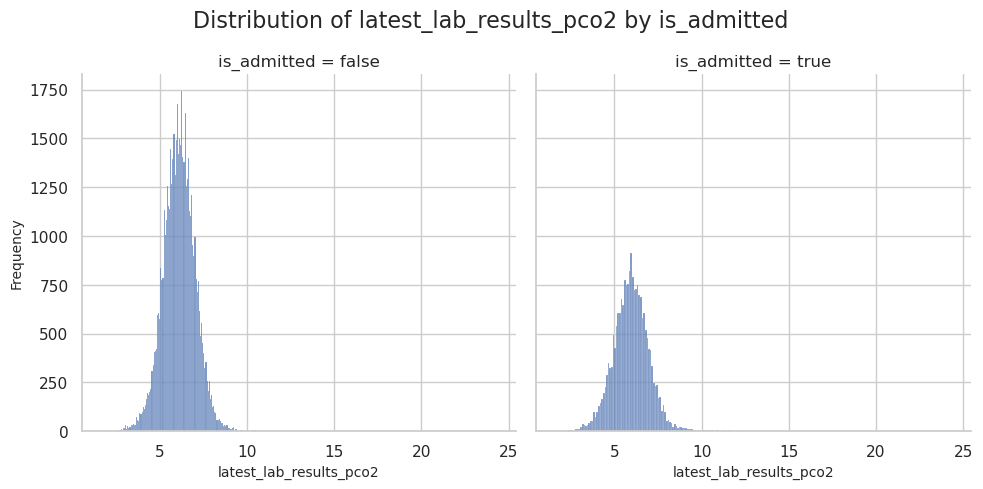

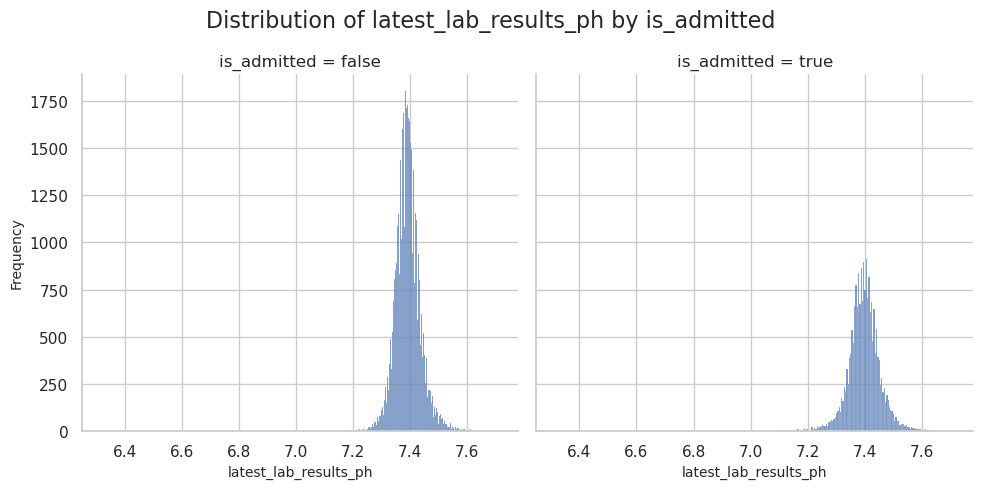

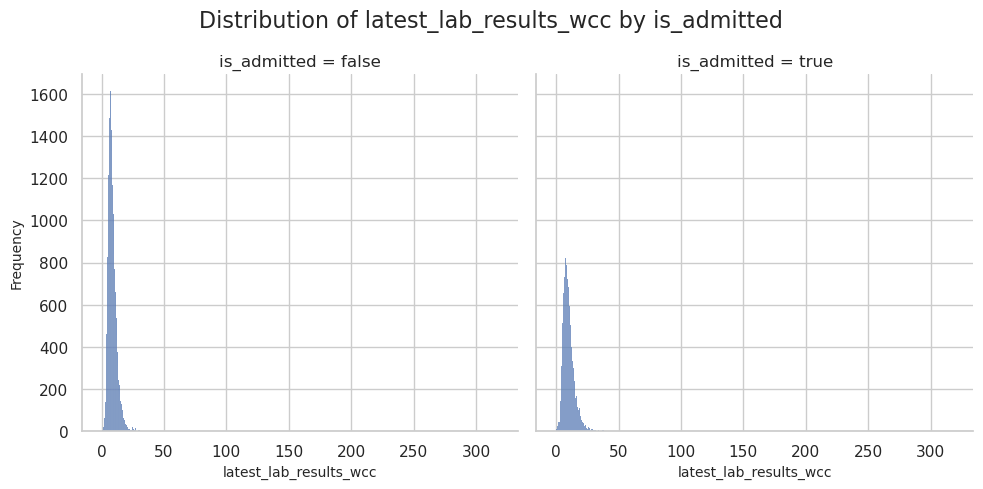

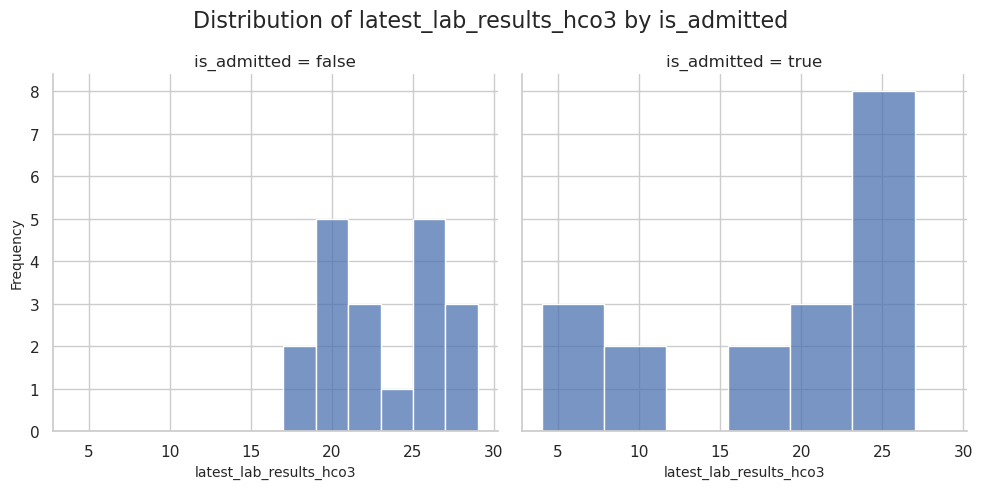

In [118]:
for col_name in dict_cols['lab orders and results']:
    plot_distributions(df, col_name, 'is_admitted', plot_type='hist')

### Consults variables

In [119]:
dict_cols['consults']


['has_consultation', 'consultation_sequence', 'final_sequence', 'specialty']

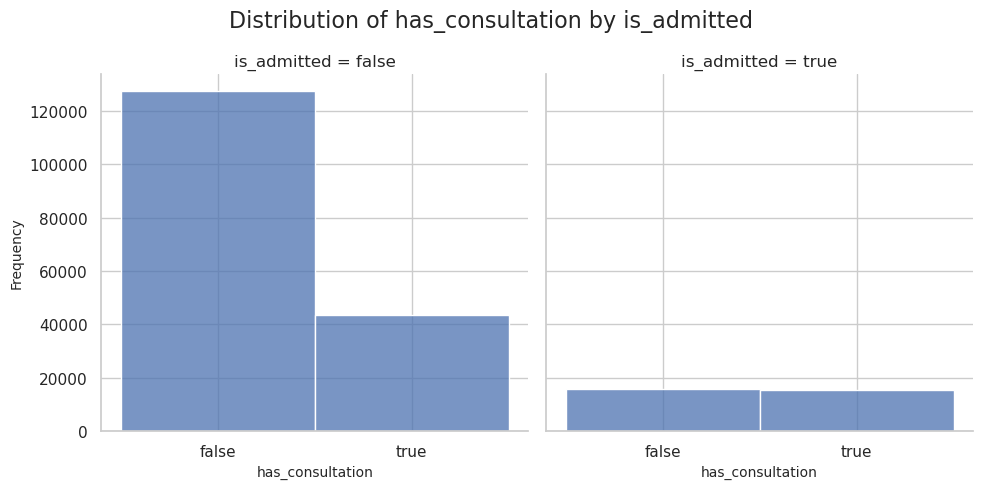

In [120]:
plot_distributions(df, 'has_consultation', 'is_admitted', plot_type='hist')

In [122]:
# Plot code if needed

model_input_path = Path(USER_ROOT / 'ed-predictor' / 'model-input')
name_mapping = pd.read_csv(str(model_input_path) + '/consults-mapping.csv')

from matplotlib import pyplot as plt
spec_summ = visits[visits['consultation_sequence'].map(len) > 0][['consultation_sequence', 'specialty']].explode('consultation_sequence').rename(columns = {'consultation_sequence': 'code'})

#.reset_index()
spec_summ = pd.merge(spec_summ, name_mapping, on='code', how='left')
spec_summ['code_name'] = spec_summ['code'] + ' ' +  spec_summ['name'].str.replace('^Inpatient consult to', '',case=False, regex=True)

# Group by both 'code_name' and 'specialty' and count occurrences
frequency = spec_summ.groupby(['code_name', 'specialty']).size().unstack(fill_value=0)

# Sort the DataFrame by the sum of each row (frequency) in descending order
frequency_sorted = frequency.sum(axis=1).sort_values(ascending=True)
frequency = frequency.loc[frequency_sorted.index]

# Create a figure object with desired size
fig, ax = plt.subplots(figsize=(20, 20))
frequency.plot(kind='barh', stacked=True, ax=ax)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('')
plt.title('Frequency of consultations in ED, mapped to reporting unit on admission', fontsize=18)
ax.legend(title='Reporting unit', fontsize=14, title_fontsize=16)  # Adjust font sizes here

# Adjust the spacing between bars on the y-axis
ax.set_yticks(range(len(frequency.index)))
ax.set_yticklabels(frequency.index, fontsize=14)
plt.tight_layout()  # Ensure tight layout to prevent overlapping
plt.gca().set_aspect('auto')  # Auto-adjust aspect ratio

plt.show()

KeyError: 'consultation_sequence'